# Problem Statement

### Introduction:
BoomBikes, a leading bike-sharing service in the U.S., has faced significant challenges due to the COVID-19 pandemic, resulting in a steep decline in revenues. As restrictions are expected to lift, BoomBikes is proactively planning to meet the potential surge in demand for bike-sharing services. This project focuses on analyzing factors that influence bike demand and aims to provide insights for optimizing the company's operations in a post-pandemic world.

### Problem Statement:
BoomBikes wants to understand the key factors affecting the demand for shared bikes in the American market. The goal is to identify which variables are significant in predicting bike demand and how effectively these variables explain the variations in demand. This understanding will help BoomBikes in making informed decisions to capture market share and boost revenues as the economy recovers.

### Key Objectives:
- Identify significant variables that predict the demand for shared bikes.
- Understand how these variables impact bike demand.
- Use the insights to help BoomBikes formulate a data-driven business strategy.

### Goal:
The goal is to build a model that predicts bike demand based on various factors, helping the company optimize its business strategy.

# Importing Libraries

In [104]:
# Importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# Reading and Understanding the Data

In [2]:
## Reading Dataset
bike_df = pd.read_csv('day.csv')

In [3]:
# Display initial data and basic info
print(bike_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [4]:
print(bike_df.shape)

(730, 16)


In [5]:
## Check for any null values
print(bike_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [6]:
bike_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
## Analyze the data
for col in bike_df.columns:
    print(bike_df[col].value_counts())

instant
1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: count, Length: 730, dtype: int64
dteday
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: count, Length: 730, dtype: int64
season
3    188
2    184
1    180
4    178
Name: count, dtype: int64
yr
0    365
1    365
Name: count, dtype: int64
mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64
holiday
0    709
1     21
Name: count, dtype: int64
weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64
workingday
1    499
0    231
Name: count, dtype: int64
weathersit
1    463
2    246
3     21
Name: count, dtype: int64
temp
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1

In [105]:
# Check for unique values

for col in bike_df.columns:
    print(f"{col}: {bike_df[col].nunique()} unique values")

yr: 2 unique values
holiday: 2 unique values
workingday: 2 unique values
temp: 493 unique values
hum: 585 unique values
windspeed: 635 unique values
cnt: 683 unique values
wind_chill_factor: 715 unique values
season_summer: 2 unique values
season_fall: 2 unique values
season_winter: 2 unique values
mnth_feb: 2 unique values
mnth_mar: 2 unique values
mnth_apr: 2 unique values
mnth_may: 2 unique values
mnth_jun: 2 unique values
mnth_jul: 2 unique values
mnth_aug: 2 unique values
mnth_sept: 2 unique values
mnth_oct: 2 unique values
mnth_nov: 2 unique values
mnth_dec: 2 unique values
weekday_mon: 2 unique values
weekday_tue: 2 unique values
weekday_wed: 2 unique values
weekday_thu: 2 unique values
weekday_fri: 2 unique values
weekday_sat: 2 unique values
weathersit_moderate: 2 unique values
weathersit_bad: 2 unique values


### Insights:
- There are 730 rows and 16 columns in the dataset.
- There are no null columns in the entire dataset.
- instant is a continuous variable which might not help us with analysis, but will check in unicariate
- 
dteday should be in datetime format but it is in object datatype.- Data types are to be handled appropriately since categorical ones are not as expected.ttc.

# Data PreProcessing and Transformation

## Data Mapping

In [23]:
# Mapping dictionaries
mapping_categoricals = {
    'season': {1: "spring", 2: "summer", 3: "fall", 4: "winter"},
    'weathersit': {1: 'good', 2: 'moderate', 3: 'bad', 4: 'severe'},
    'mnth': {1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun',
             7: 'jul', 8: 'aug', 9: 'sept', 10: 'oct', 11: 'nov', 12: 'dec'},
    'weekday': {0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat'}
}

# Apply replacements
bike_df.replace(mapping_categoricals, inplace=True)

In [24]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [25]:
print(bike_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     716 non-null    int64         
 1   dteday      716 non-null    datetime64[ns]
 2   season      716 non-null    category      
 3   yr          716 non-null    category      
 4   mnth        716 non-null    category      
 5   holiday     716 non-null    category      
 6   weekday     716 non-null    category      
 7   workingday  716 non-null    category      
 8   weathersit  716 non-null    category      
 9   temp        716 non-null    float64       
 10  atemp       716 non-null    float64       
 11  hum         716 non-null    float64       
 12  windspeed   716 non-null    float64       
 13  casual      716 non-null    int64         
 14  registered  716 non-null    int64         
 15  cnt         716 non-null    int64         
dtypes: category(7), datetime64[ns](

In [26]:
print(bike_df.describe())

          instant                         dteday        temp       atemp  \
count  716.000000                            716  716.000000  716.000000   
mean   366.277933  2019-01-01 06:40:13.407821056   20.400717   23.821520   
min      1.000000            2018-01-01 00:00:00    2.424346    3.953480   
25%    184.750000            2018-07-03 18:00:00   13.828962   16.894537   
50%    364.500000            2018-12-30 12:00:00   20.739153   24.605200   
75%    549.250000            2019-07-03 06:00:00   26.931885   30.556050   
max    730.000000            2019-12-31 00:00:00   35.328347   42.044800   
std    210.684153                            NaN    7.529887    8.159941   

              hum   windspeed       casual   registered          cnt  
count  716.000000  716.000000   716.000000   716.000000   716.000000  
mean    63.132034   12.481868   858.050279  3678.562849  4536.613128  
min     25.416700    1.500244     2.000000    20.000000    22.000000  
25%     52.458300    8.989859  

In [27]:
print(bike_df.head(10))

   instant     dteday  season yr mnth holiday weekday workingday weathersit  \
0        1 2018-01-01  spring  0  jan       0     sat          0   moderate   
1        2 2018-01-02  spring  0  jan       0     sun          0   moderate   
2        3 2018-01-03  spring  0  jan       0     mon          1       good   
3        4 2018-01-04  spring  0  jan       0     tue          1       good   
4        5 2018-01-05  spring  0  jan       0     wed          1       good   
5        6 2018-01-06  spring  0  jan       0     thu          1       good   
6        7 2018-01-07  spring  0  jan       0     fri          1   moderate   
7        8 2018-01-08  spring  0  jan       0     sat          0   moderate   
8        9 2018-01-09  spring  0  jan       0     sun          0       good   
9       10 2018-01-10  spring  0  jan       0     mon          1       good   

        temp     atemp      hum  windspeed  casual  registered   cnt  
0  14.110847  18.18125  80.5833  10.749882     331         

## Handling Outliers

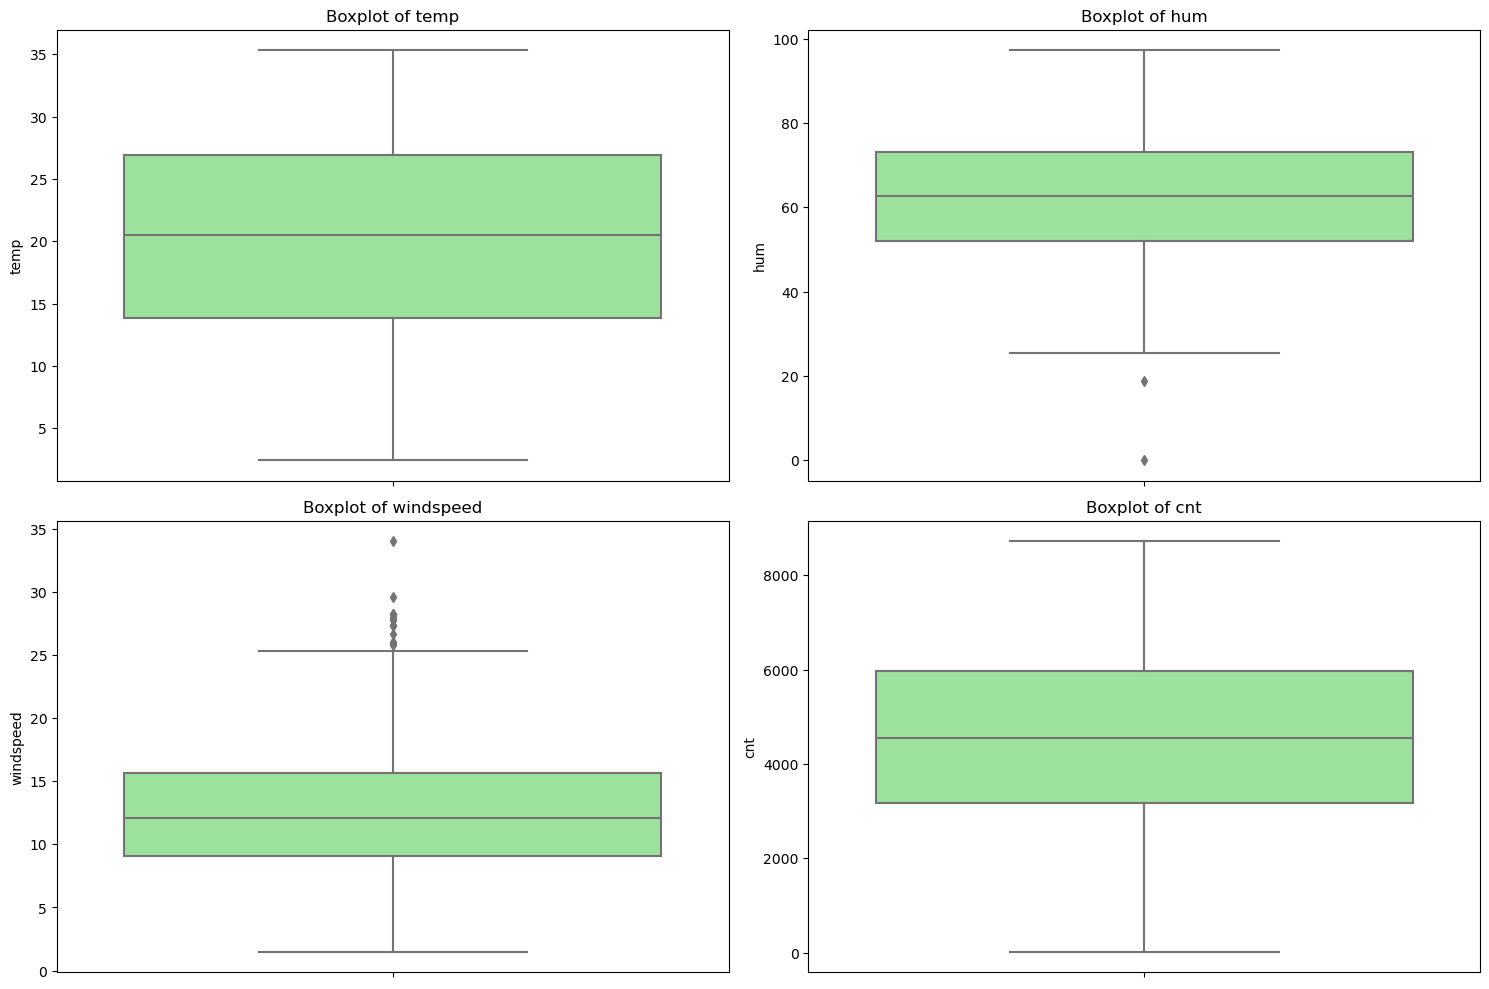

In [20]:
# List of columns to plot
columns_to_plot = ['temp', 'hum', 'windspeed', 'cnt']

# Create a figure and axes
plt.figure(figsize=(15, 10))

# Plot boxplots for each column
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)  
    sns.boxplot(y=bike_df[column], color='lightgreen')
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

# Adjust layout to fit all subplots
plt.tight_layout()
plt.show()


In [21]:
# Iterate over each column to handle outliers
for column in columns_to_plot:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = bike_df[column].quantile(0.25)
    Q3 = bike_df[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    bike_df = bike_df[(bike_df[column] >= lower_bound) & (bike_df[column] <= upper_bound)]
    
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### After handling outliers

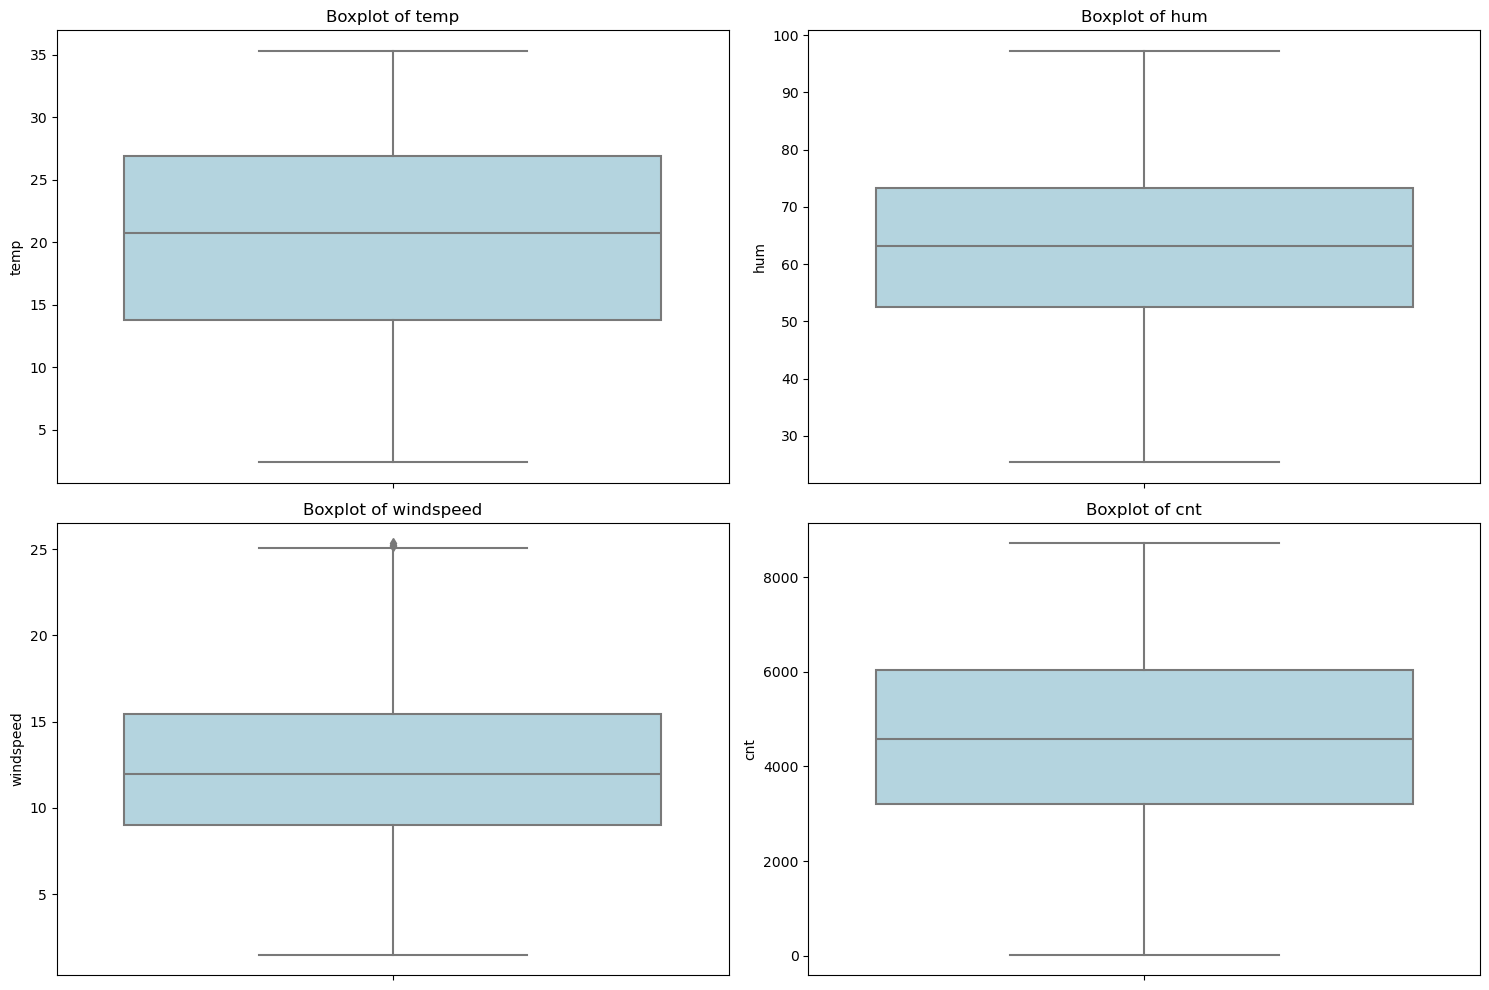

In [22]:
# List of columns to plot
columns_to_plot = ['temp', 'hum', 'windspeed', 'cnt']

# Create a figure and axes
plt.figure(figsize=(15, 10))

# Plot boxplots for each column
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)  
    sns.boxplot(y=bike_df[column], color='lightblue')
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

# Adjust layout to fit all subplots
plt.tight_layout()
plt.show()

In [28]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

# Exploratory Data Analysis

In [9]:
bike_df['dteday'] = pd.to_datetime(bike_df['dteday'], format='%d-%m-%Y')

In [10]:
categorical_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for var in categorical_vars:
    bike_df[var] = bike_df[var].astype('category')

## Univariate Analysis

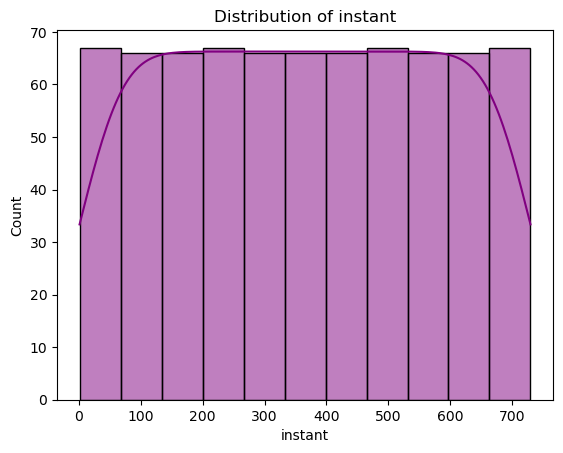

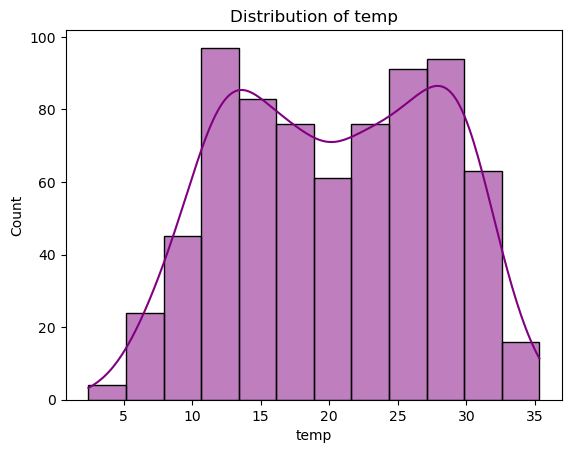

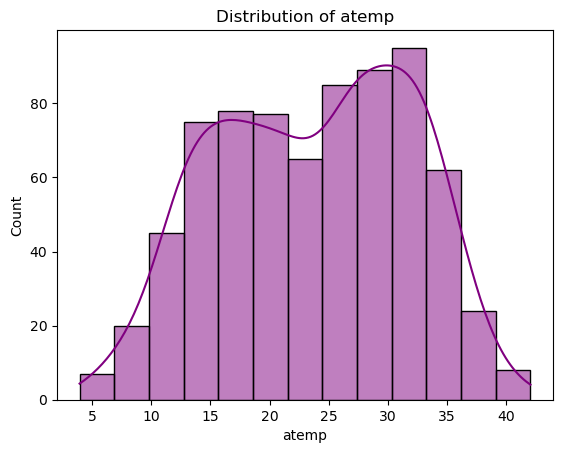

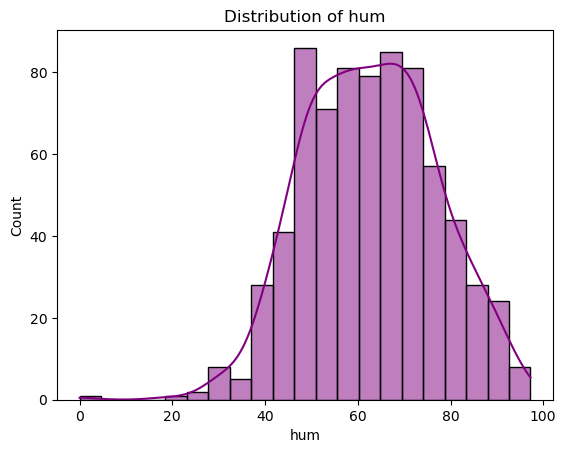

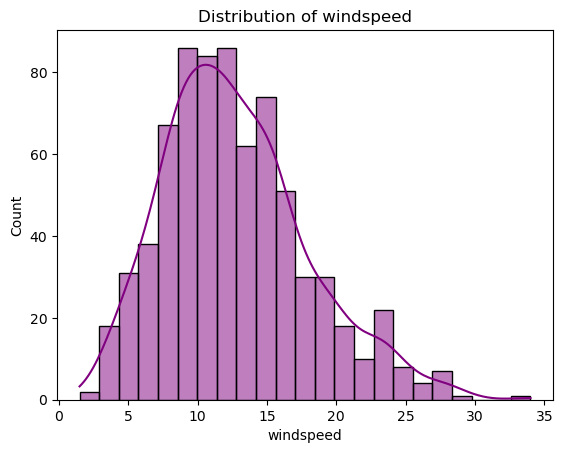

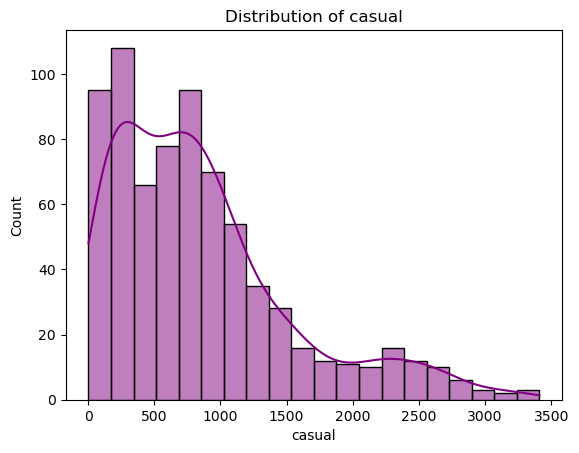

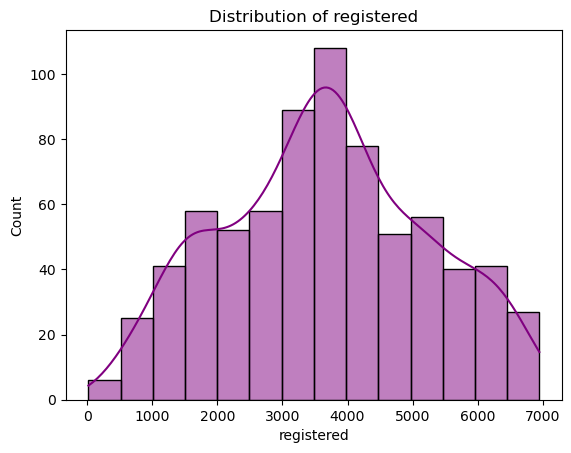

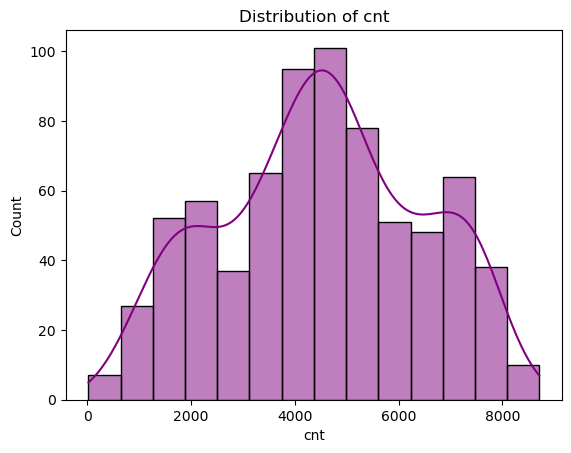

In [11]:
# Univariate Analysis
continuous_vars = ['instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

for var in continuous_vars:
    sns.histplot(bike_df[var], kde=True, color='purple')
    plt.title(f'Distribution of {var}')
    plt.show()



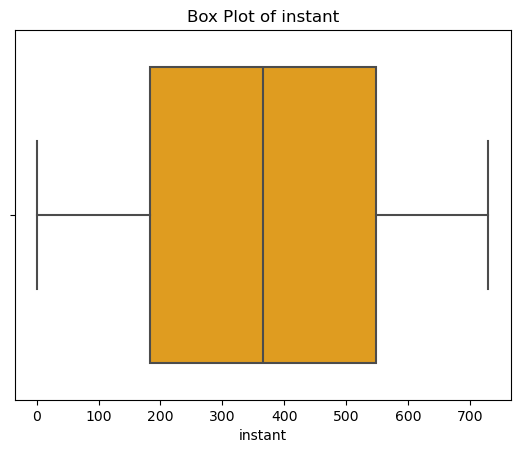

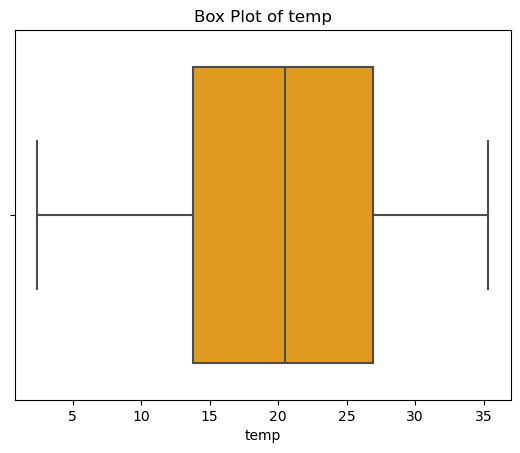

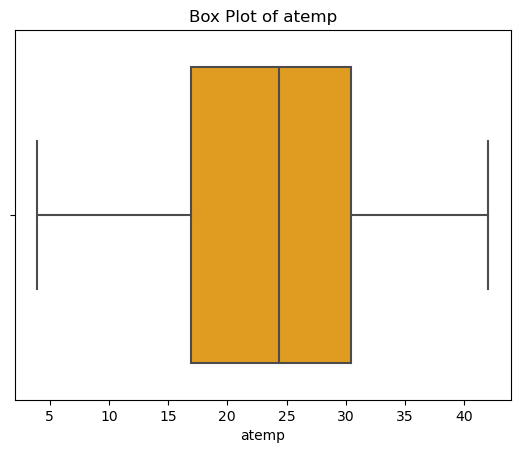

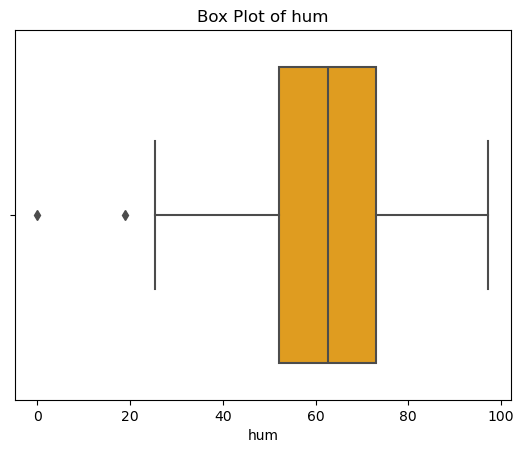

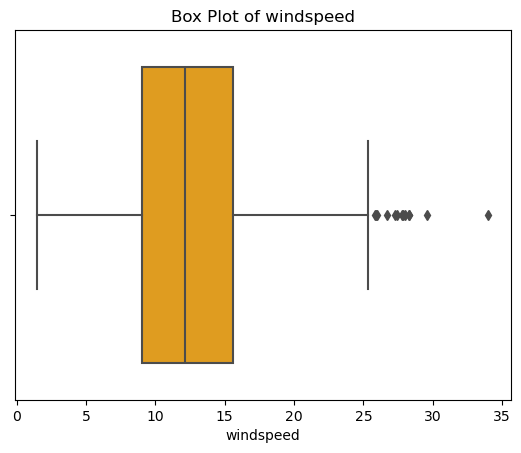

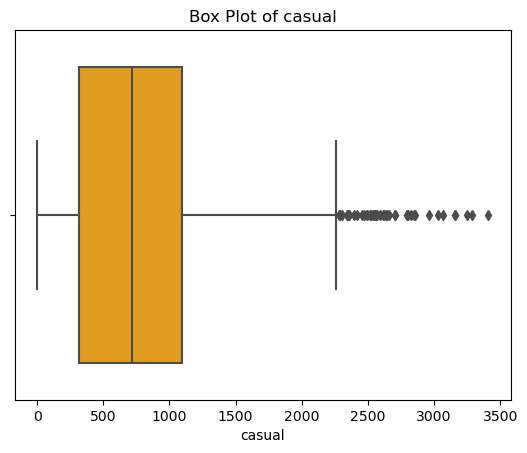

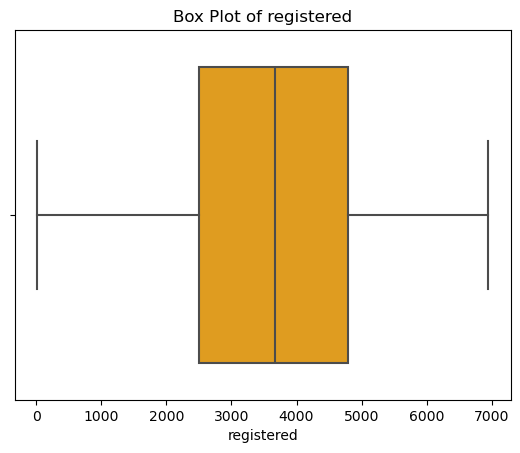

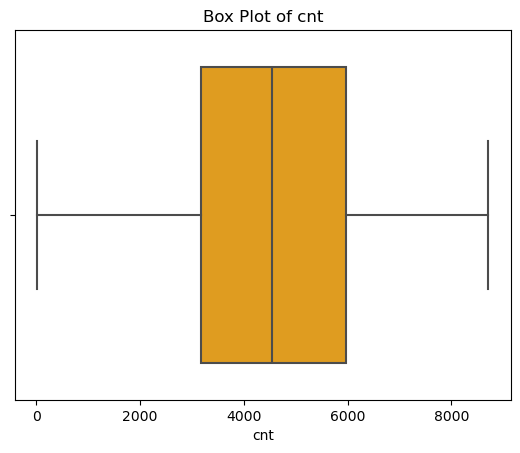

In [12]:
# Box plots for detecting outliers
for var in continuous_vars:
    sns.boxplot(x=bike_df[var], color='orange')
    plt.title(f'Box Plot of {var}')
    plt.show()


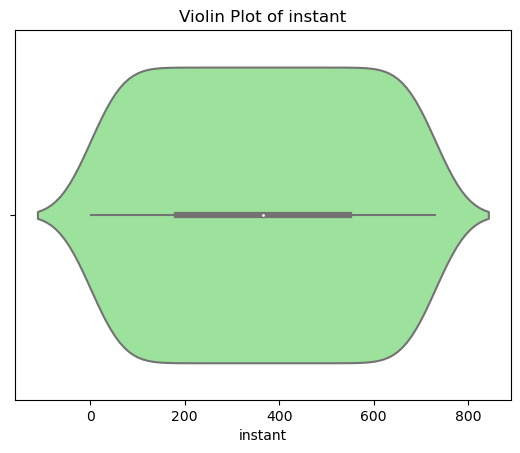

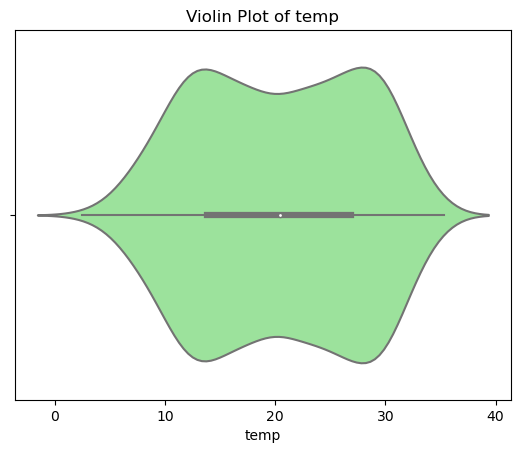

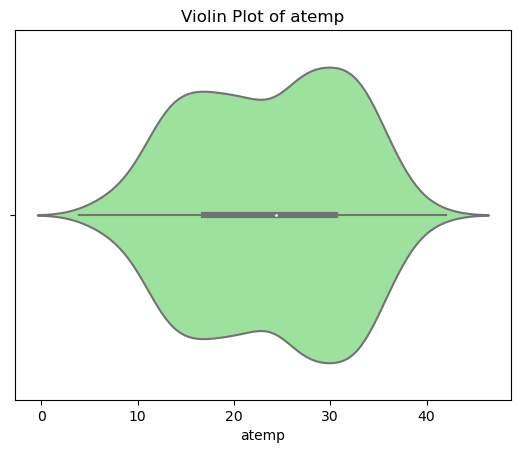

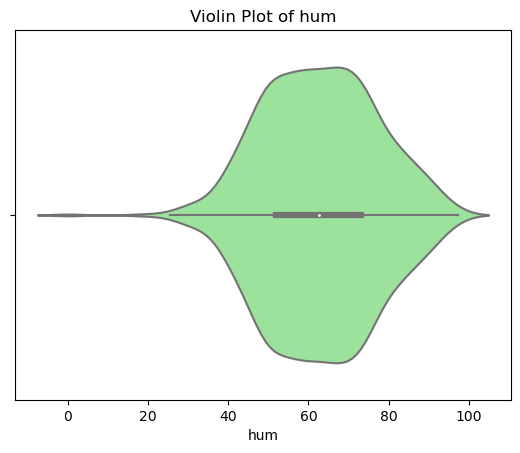

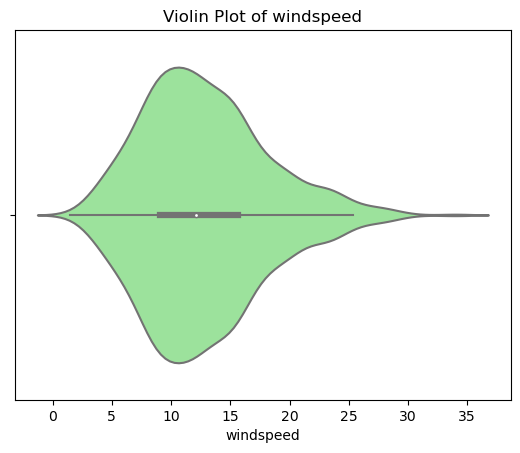

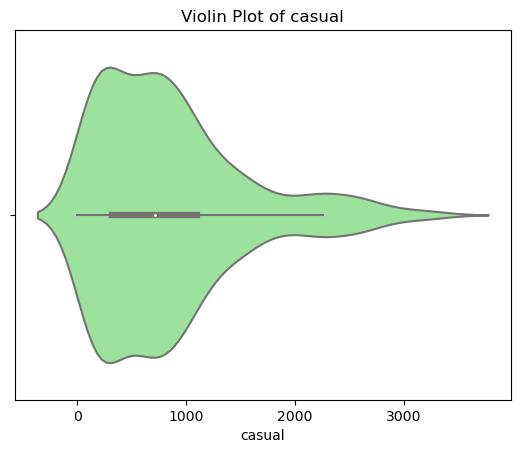

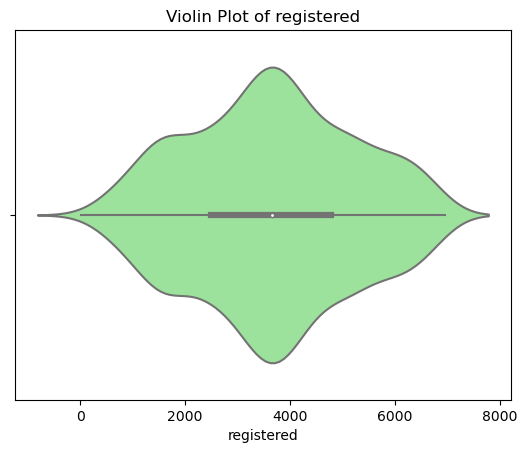

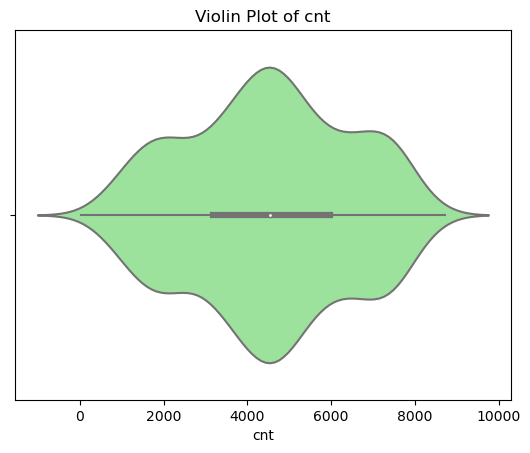

In [13]:
for var in continuous_vars:
    sns.violinplot(bike_df, x=var, color='lightgreen')
    plt.title(f'Violin Plot of {var}')
    plt.show()
    

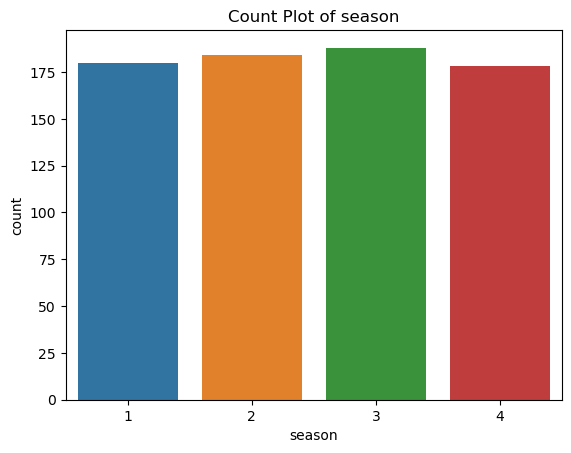

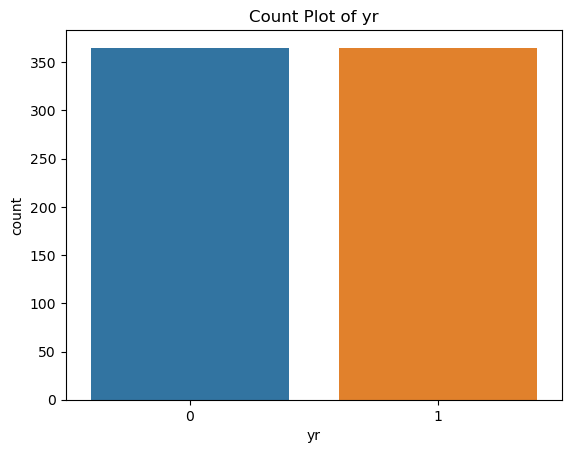

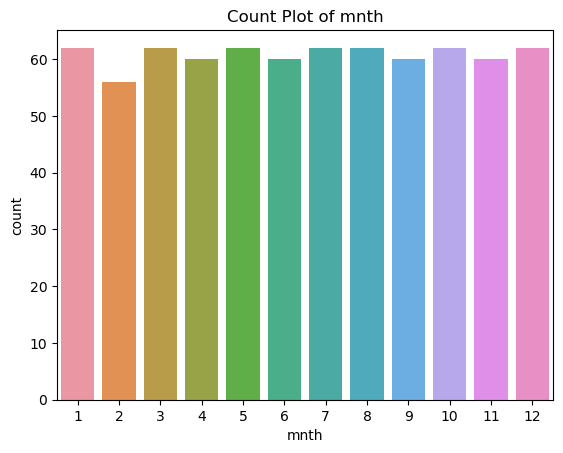

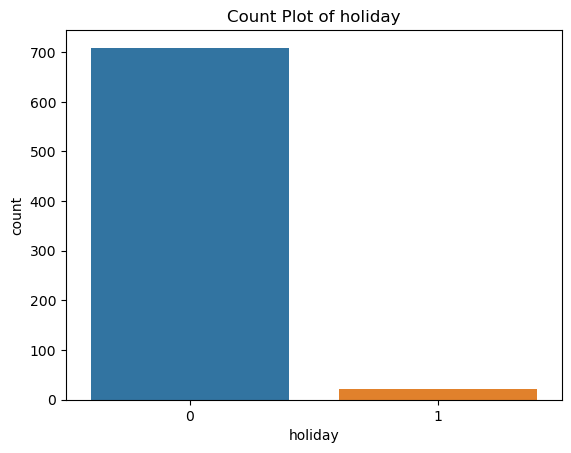

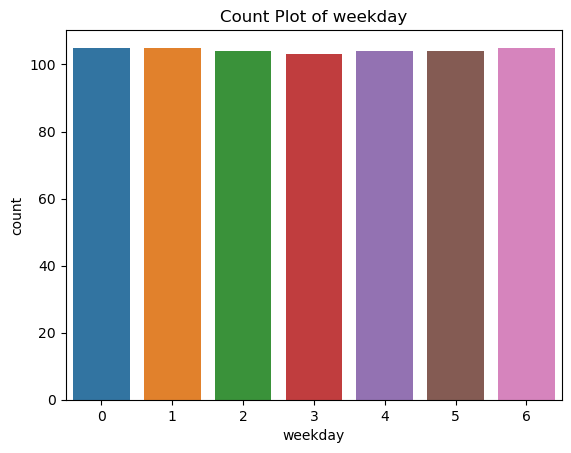

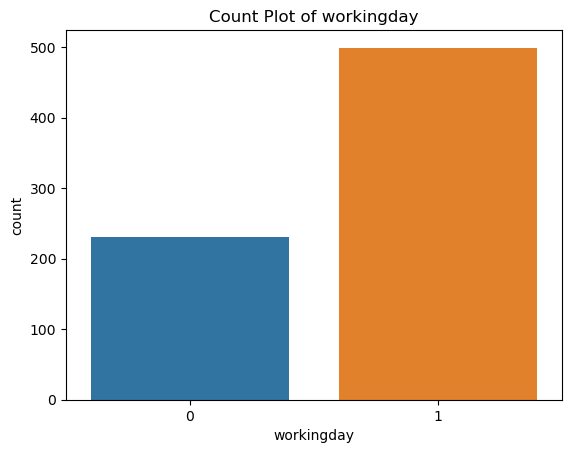

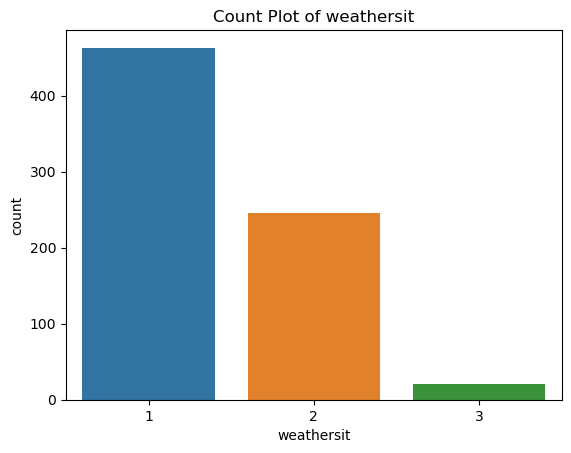

In [14]:
# Count plots for categorical features
for var in categorical_vars:
    sns.countplot(x=bike_df[var])
    plt.title(f'Count Plot of {var}')
    plt.show()

## Bivariate Analysis

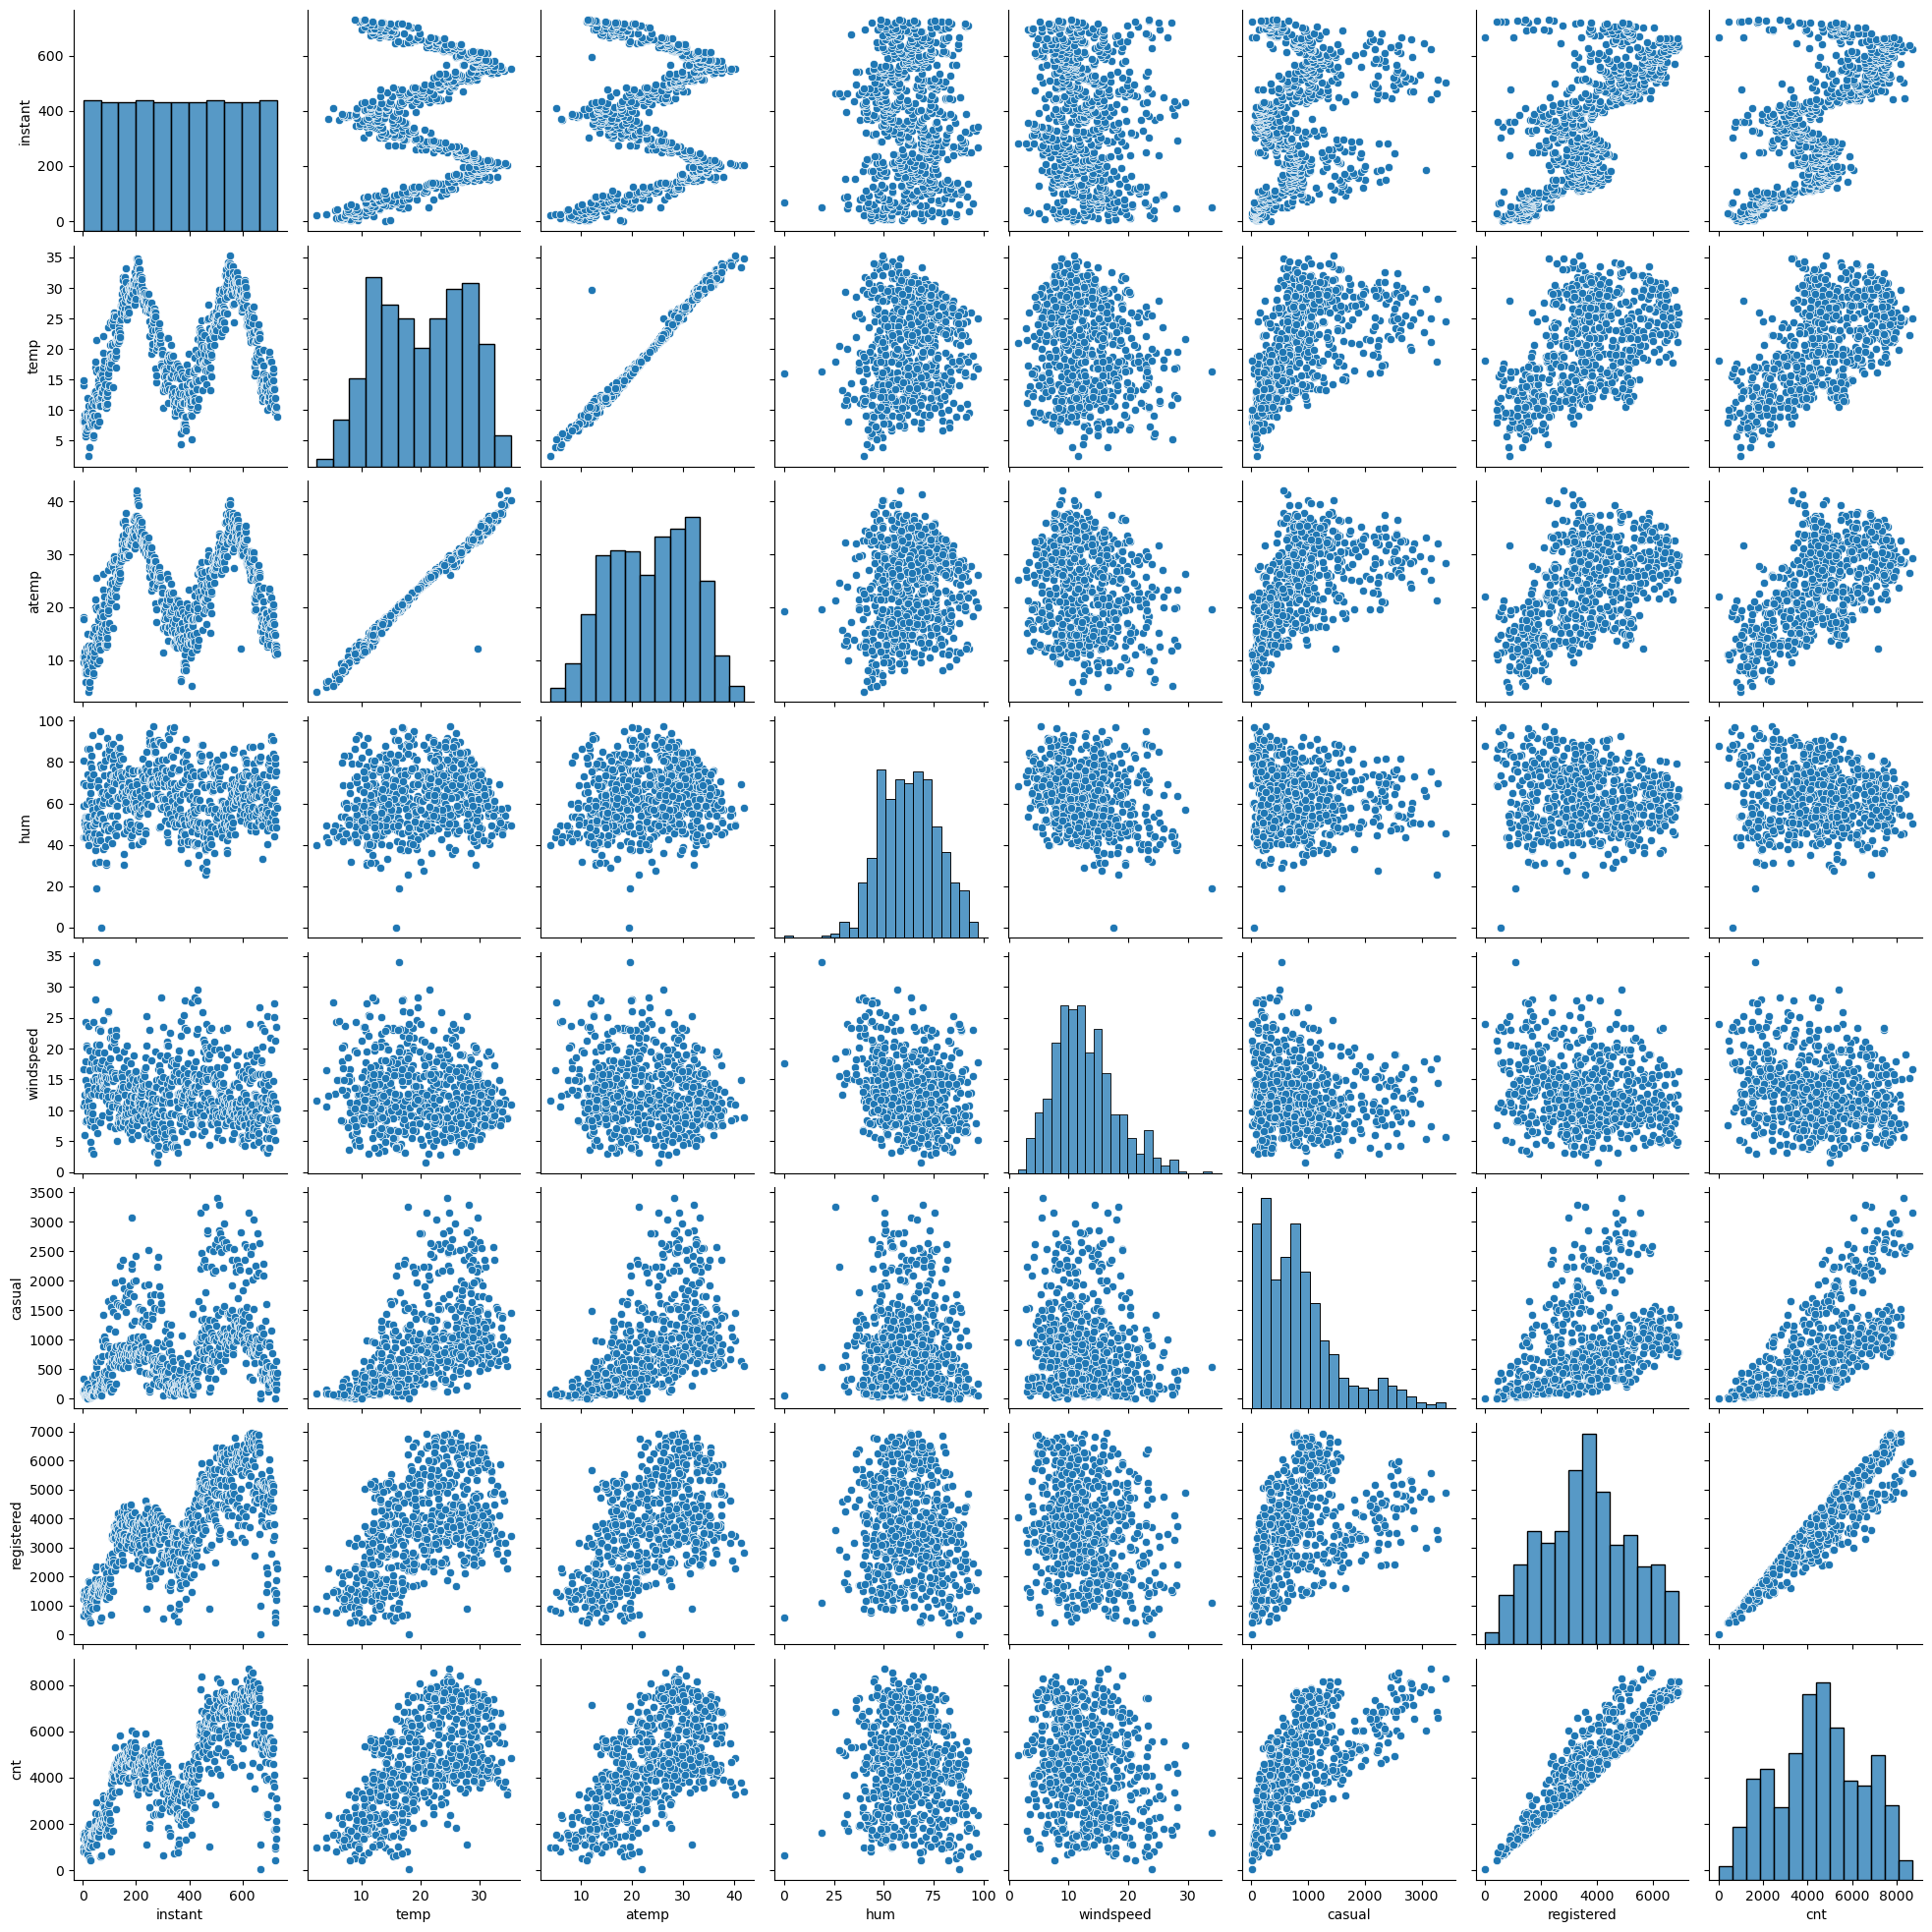

In [15]:
# Pair plots for numerical variables
sns.pairplot(data=bike_df, vars=continuous_vars)
plt.show()

### Insights:

- cnt is positively correlated with temp

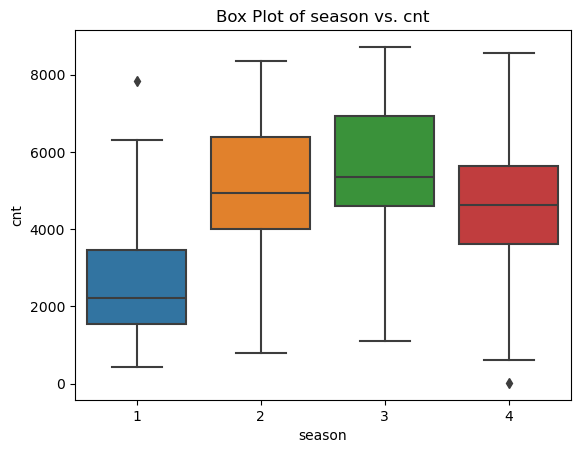

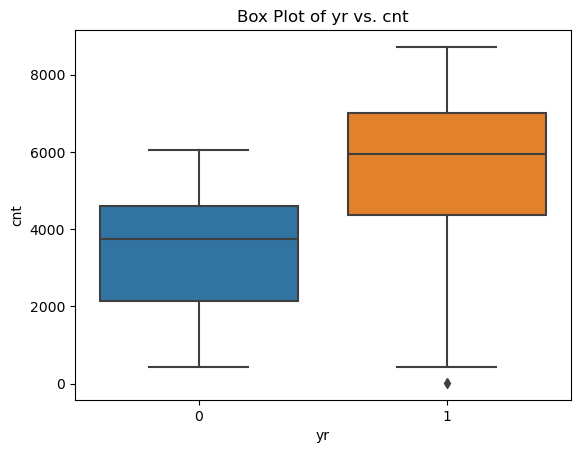

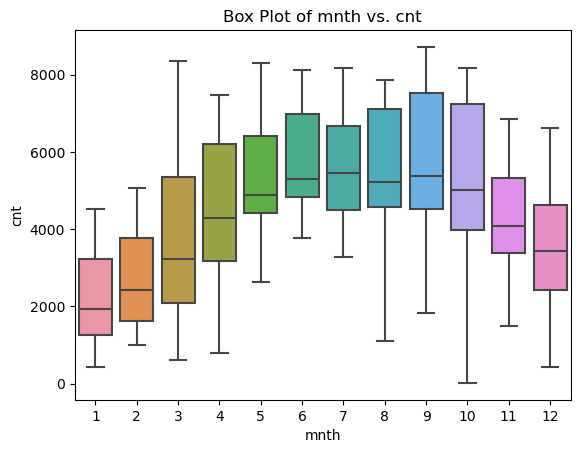

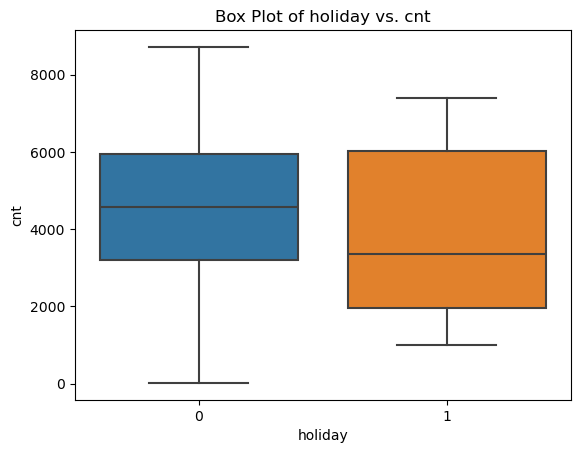

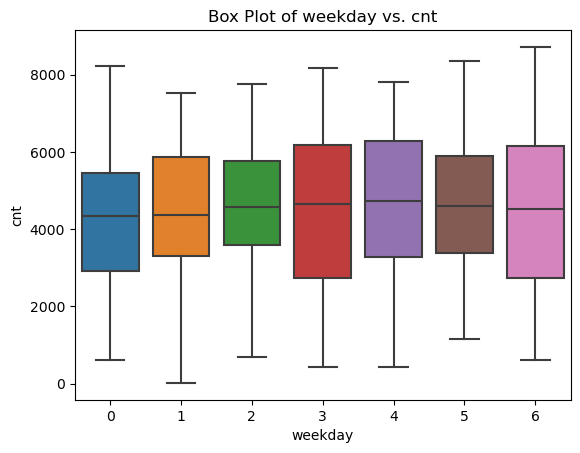

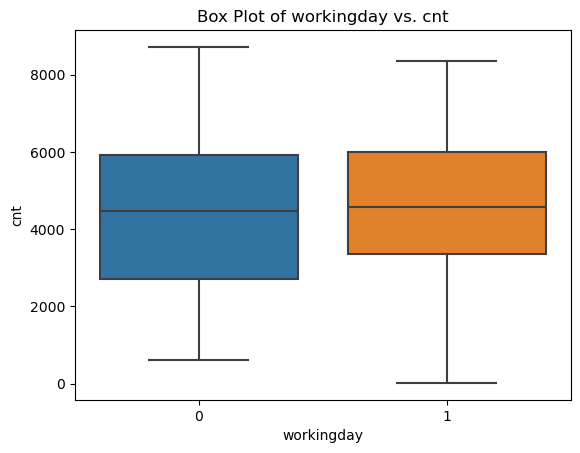

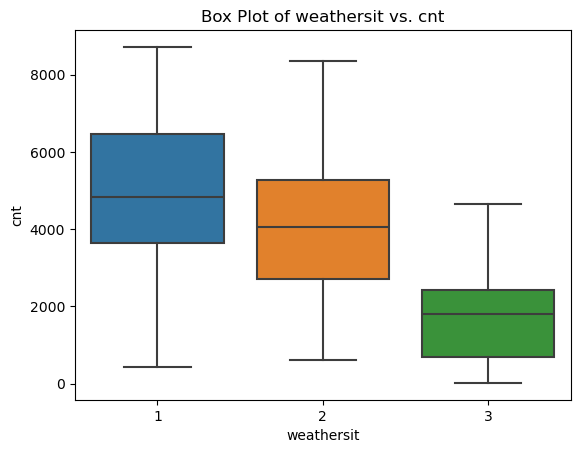

In [16]:
# Box plots for categorical variables against 'cnt'
for var in categorical_vars:
    sns.boxplot(x=bike_df[var], y=bike_df['cnt'])
    plt.title(f'Box Plot of {var} vs. cnt')
    plt.show()

## Multivariate Analysis

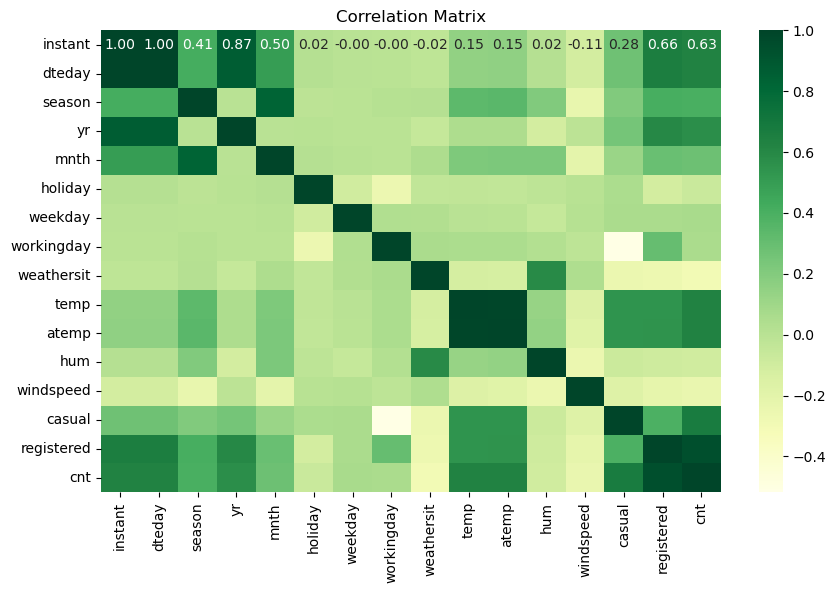

In [17]:
#### Correlation Matrix 
plt.figure(figsize=(10, 6))
sns.heatmap(bike_df.corr(), annot=True, cmap='YlGn', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

##### Insights
- temp and atemp are highly correlated
- registered, cnt and casual are highly correlated since cnt = registered + casual; This shows multicollinearity and hence these two can be dropped


In [18]:
### Q-Q Plot to check for normality of 'cnt'


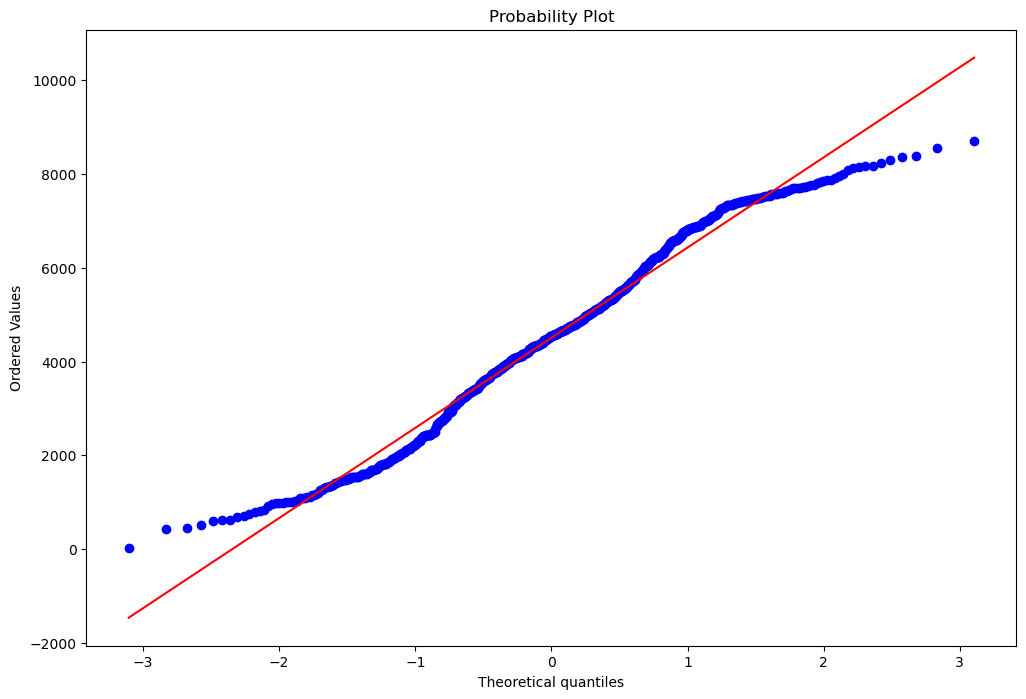

In [19]:
fig = plt.figure(figsize=(12, 8))
stats.probplot(bike_df.cnt, dist='norm', plot=plt)
plt.show()

# Data Preparation and Data Cleaning

## Deriving New Variables

- Deriving wind_chill_factor: This could influence people's decision to rent bikes

In [29]:
bike_df['wind_chill_factor'] = bike_df['windspeed'] * bike_df['temp']

In [30]:
bike_df['wind_chill_factor'].head()

0    151.689940
1    248.159746
2    133.940831
3     88.066622
4    116.522969
Name: wind_chill_factor, dtype: float64

#### Deleting irrlevant rows is also one of the primary steps in data cleaning.
- As per the insights from Univariate, bivariate and multivariate analysis, we are dropping atemp since atemp and temp are highly correlated.
- Since instant is a continuous variable, it won't help us with analysis and hence dropping it.
- dteday has date, time and month -> we have day of the week, month and year fields separately and hence dropping this.
- Time in dteday is being used in a different variable that's derived : Is_peak_hour
- cnt = registered + casual. Hence dropping both these.


In [31]:
# Dropping unnecessary columns
bike_df.drop(['instant', 'dteday', 'registered', 'casual', 'atemp'], axis=1, inplace=True)

## Creating Dummies

In [32]:
# Create dummy variables for categorical features
bike_df = pd.get_dummies(data=bike_df, columns=["season", "mnth", "weekday", "weathersit"], drop_first=True)

In [33]:
bike_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'wind_chill_factor', 'season_summer', 'season_fall', 'season_winter',
       'mnth_feb', 'mnth_mar', 'mnth_apr', 'mnth_may', 'mnth_jun', 'mnth_jul',
       'mnth_aug', 'mnth_sept', 'mnth_oct', 'mnth_nov', 'mnth_dec',
       'weekday_mon', 'weekday_tue', 'weekday_wed', 'weekday_thu',
       'weekday_fri', 'weekday_sat', 'weathersit_moderate', 'weathersit_bad'],
      dtype='object')

## Convert Binary Categorical Columns from True/False, Yes/No to 0/1

In [34]:
# Convert binary categorical columns from True/False to 0/1
columns_to_convert = ['season_summer', 'season_fall', 'season_winter', 'mnth_feb', 'mnth_mar',
       'mnth_apr', 'mnth_may', 'mnth_jun', 'mnth_jul', 'mnth_aug', 'mnth_sept',
       'mnth_oct', 'mnth_nov', 'mnth_dec', 'weekday_mon', 'weekday_tue',
       'weekday_wed', 'weekday_thu', 'weekday_fri', 'weekday_sat',
       'weathersit_moderate', 'weathersit_bad']

In [35]:
bike_df[columns_to_convert] = bike_df[columns_to_convert].astype(int)

In [36]:
bike_df.head(5)

,yr,holiday,workingday,temp,hum,windspeed,cnt,wind_chill_factor,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weathersit_moderate,weathersit_bad
0,0,0,0,14.110847,80.5833,10.749882,985,151.689940,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,248.159746,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,133.940831,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,88.066622,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,116.522969,0,0,...,0,0,0,0,1,0,0,0,0,0


In [37]:
bike_df.tail(5)

,yr,holiday,workingday,temp,hum,windspeed,cnt,wind_chill_factor,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weathersit_moderate,weathersit_bad
725,1,0,1,10.420847,65.2917,23.458911,2114,244.461722,0,0,...,0,1,0,0,0,1,0,0,1,0
726,1,0,1,10.386653,59.0000,10.416557,3095,108.193163,0,0,...,0,1,0,0,0,0,1,0,1,0
727,1,0,0,10.386653,75.2917,8.333661,1341,86.558845,0,0,...,0,1,0,0,0,0,0,1,1,0
728,1,0,0,10.489153,48.3333,23.500518,1796,246.500529,0,0,...,0,1,0,0,0,0,0,0,0,0
729,1,0,1,8.849153,57.7500,10.374682,2729,91.807148,0,0,...,0,1,1,0,0,0,0,0,1,0


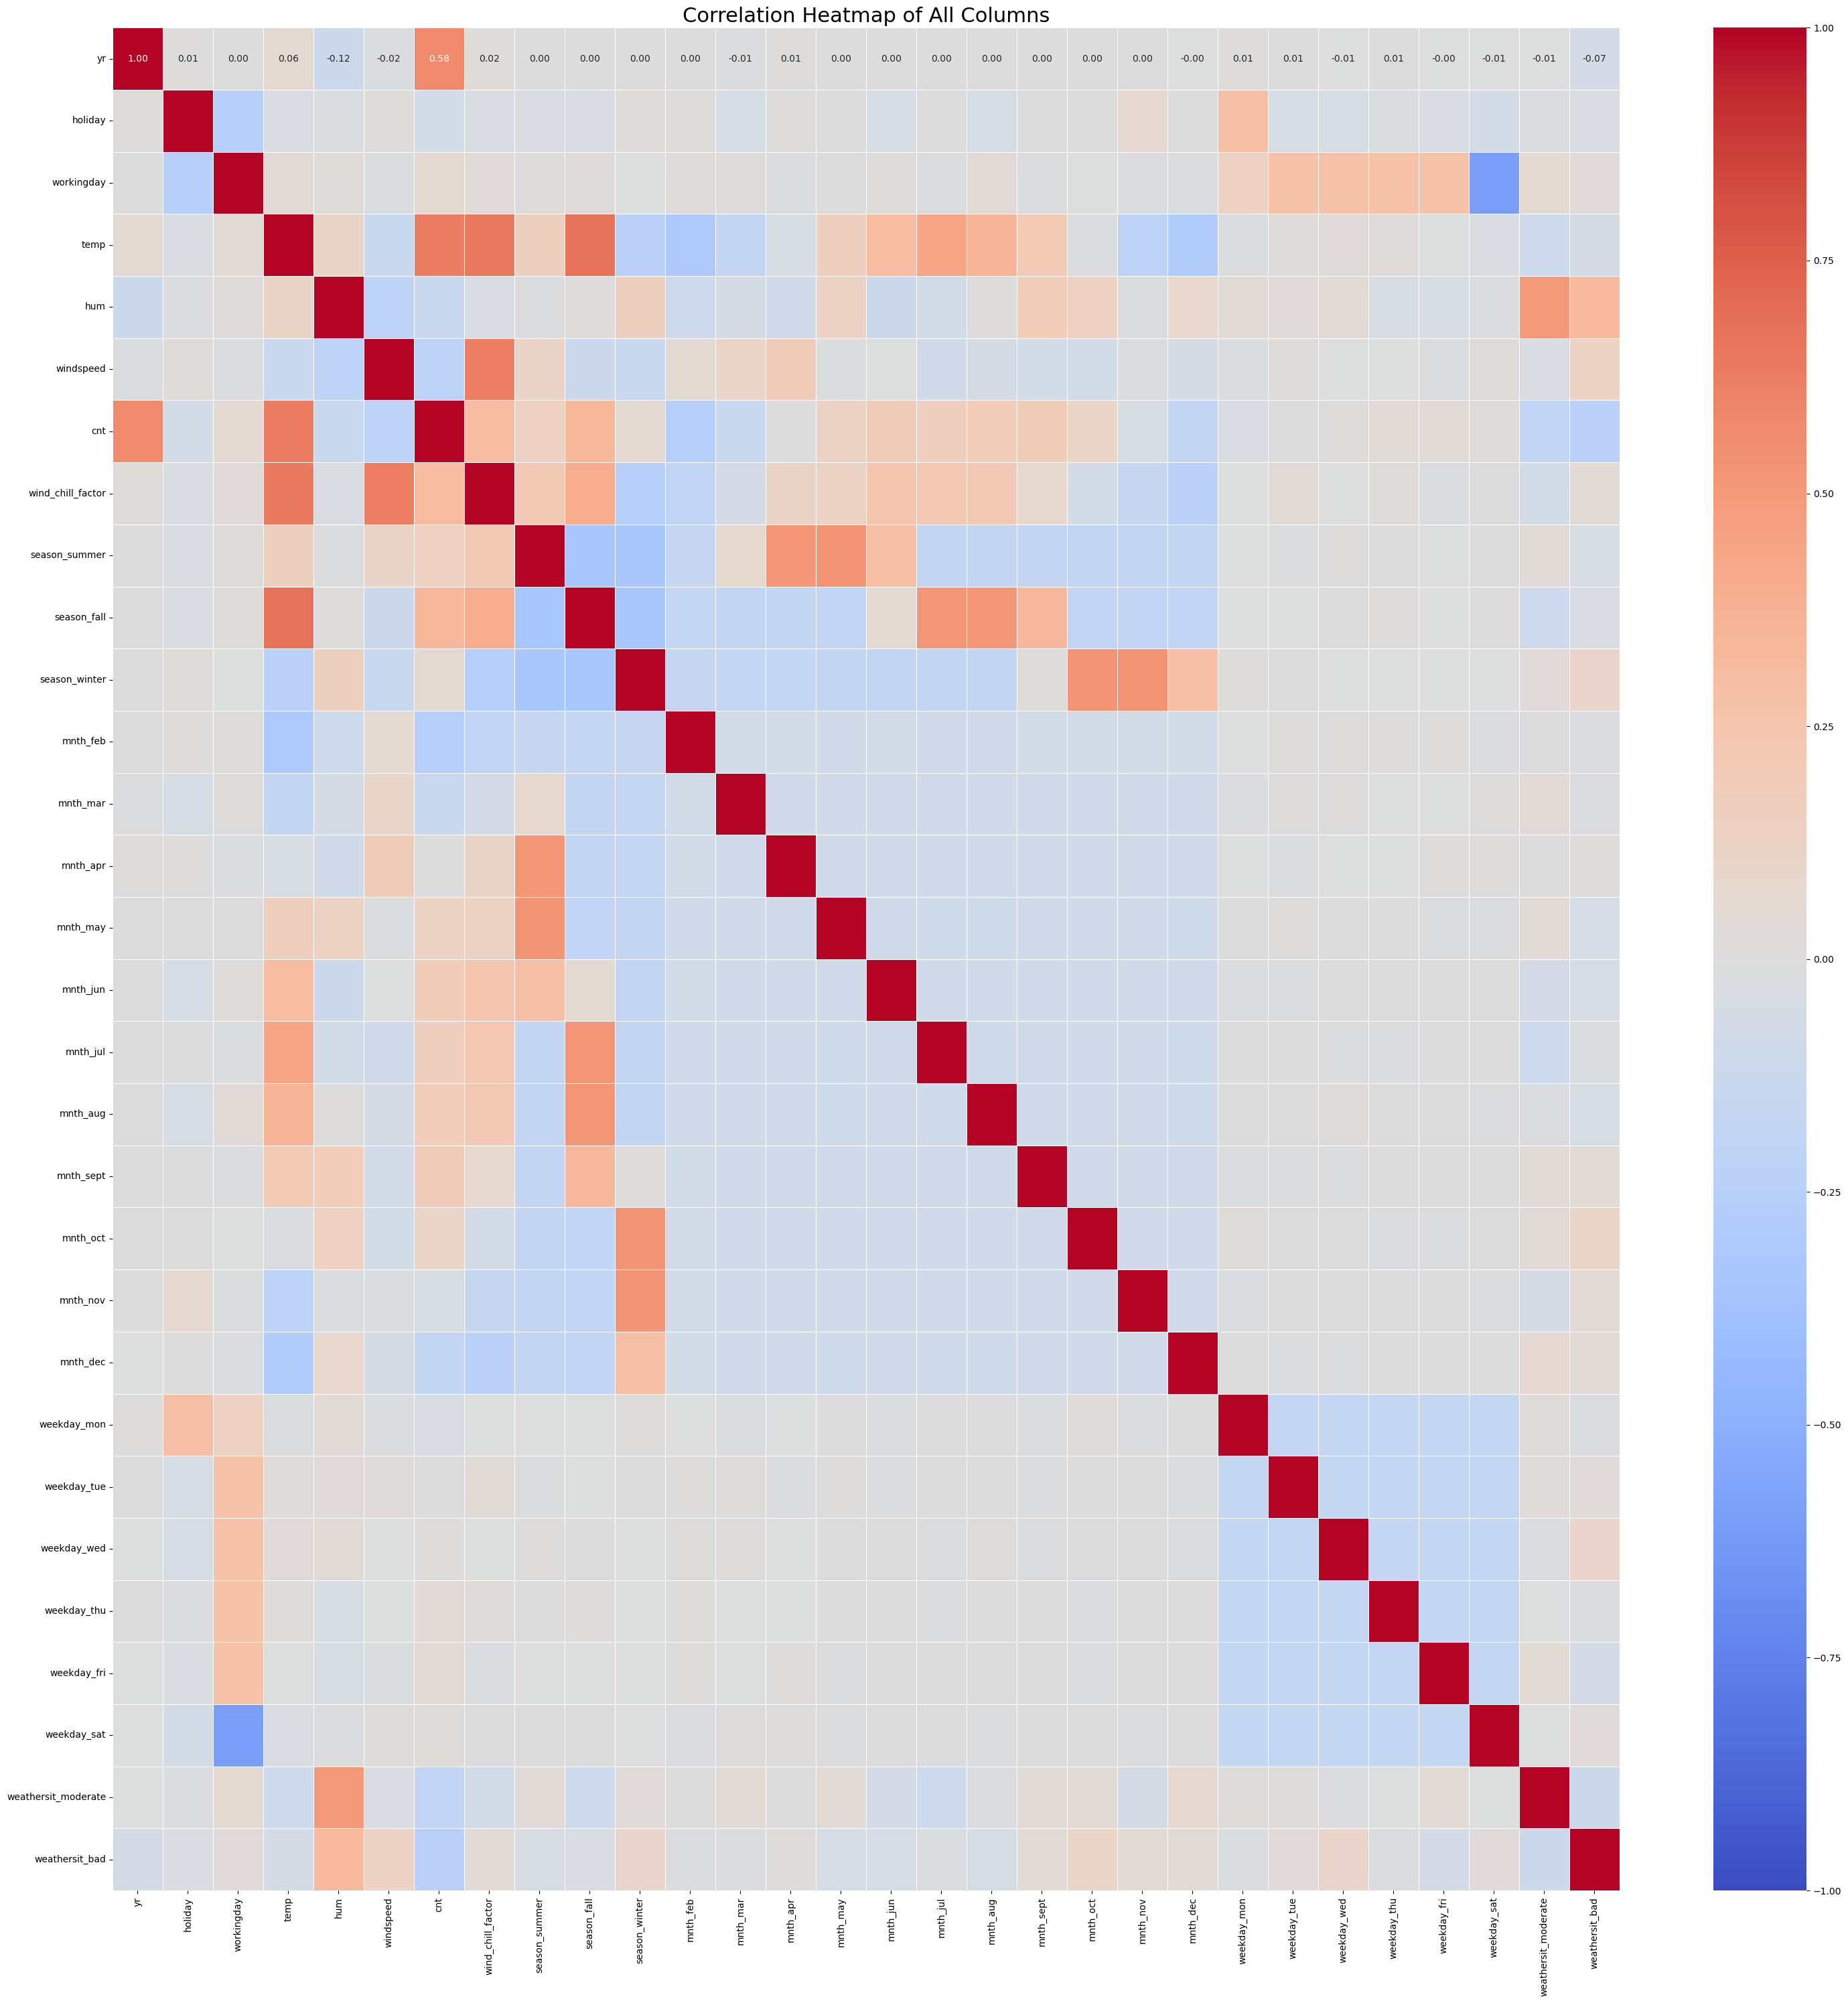

In [121]:
# Compute correlation matrix
corr_matrix = bike_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(30, 30))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Add titles and labels
plt.title('Correlation Heatmap of All Columns', fontsize=22)
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

### Correlation Criteria:
|r| ≥ 0.5: Very Strong Correlation - The variables are highly related.
|r| < 0.1: Weak Correlation - The relationship between the variables is minimal.
0.1 ≤ |r| < 0.3: Moderate Correlation - Some relationship exists, but it's not very strong.
0.3 ≤ |r| < 0.5: Strong Correlation - There is a notable relationship between the variables.


### Insights
- Weekdays, Working Days, and Holidays:

There is a strong negative correlation between working_day and weekday_sat as well as weekday_sun.
working_day shows moderate correlations with other weekdays and holidays.
Weather Situations and Humidity:

- Humidity (hum) has a strong positive correlation with weather_situations_moderate.
A moderate positive correlation exists between hum and weather_situations_moderate.
Count Variable (cnt):

- cnt has a very strong positive correlation with temperature and the year_2019.
There is a very strong negative correlation between cnt and season_spring.
Season Spring and Temperature:

- season_spring and temperature show a very strong negative correlation. To avoid multicollinearity, it's important to calculate the Variance Inflation Factor (VIF) to determine if including season_spring alongside temperature may cause multicollinearity issues.
Weather Situations Dummies:

- weather_situations_moderate has a very strong negative correlation with weather_situations_good.
The dataset includes dummies for three weather situations out of four possible values, so it's important not to drop any of these columns. Doing so would cause the loss of information regarding the weather_situations_severe, which is absent in the dataset.


# Model Building

## Splitting into Train and Test

In [38]:
bike_df.shape

(716, 30)

In [39]:
# Splitting Data into Training and Test Sets in the ratio of 70:30
bike_df_train, bike_df_test = train_test_split(bike_df, train_size=0.7, random_state=14)


print(f"Training Set Shape: {bike_df_train.shape}")


print(f"Test Set Shape: {bike_df_test.shape}")

Training Set Shape: (501, 30)
Test Set Shape: (215, 30)


In [40]:
bike_df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,wind_chill_factor,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weathersit_moderate,weathersit_bad
73,0,0,1,13.013031,65.5652,12.348703,2056,160.694055,0,0,...,0,0,0,1,0,0,0,0,1,0
645,1,1,0,15.716653,70.9583,12.708493,5478,199.734975,0,0,...,0,0,1,0,0,0,0,0,1,0
37,0,0,1,11.138347,73.8333,3.042356,1712,33.886818,0,0,...,0,0,1,0,0,0,0,0,0,0
126,0,0,0,21.320000,54.1250,10.750150,4714,229.193198,1,0,...,0,0,0,0,0,0,0,1,0,0
429,1,0,1,10.591653,45.6667,13.458625,3956,142.549086,0,0,...,0,0,0,1,0,0,0,0,0,0


In [41]:
bike_df_test.tail()

,yr,holiday,workingday,temp,hum,windspeed,cnt,wind_chill_factor,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weathersit_moderate,weathersit_bad
33,0,0,1,7.665237,43.7826,18.609384,1550,142.645339,0,0,...,0,0,0,0,0,1,0,0,0,0
32,0,0,1,10.660000,77.5417,17.708636,1526,188.774060,0,0,...,0,0,0,0,1,0,0,0,1,0
696,1,0,1,12.163347,50.6250,14.125007,5260,171.807362,0,0,...,1,0,0,0,1,0,0,0,0,0
481,1,0,1,18.757500,40.0833,23.291411,6233,436.888642,1,0,...,0,0,0,0,0,0,1,0,0,0
588,1,0,0,28.734153,53.0417,8.208304,6544,235.858663,0,1,...,0,0,0,0,0,0,0,0,0,0


# Scaling the Train and Test Datasets

In [42]:
bike_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'wind_chill_factor', 'season_summer', 'season_fall', 'season_winter',
       'mnth_feb', 'mnth_mar', 'mnth_apr', 'mnth_may', 'mnth_jun', 'mnth_jul',
       'mnth_aug', 'mnth_sept', 'mnth_oct', 'mnth_nov', 'mnth_dec',
       'weekday_mon', 'weekday_tue', 'weekday_wed', 'weekday_thu',
       'weekday_fri', 'weekday_sat', 'weathersit_moderate', 'weathersit_bad'],
      dtype='object')

In [43]:
## Continuous Variables to be scaled
num_vars_scale = ['temp', 'hum', 'windspeed', 'wind_chill_factor', 'cnt']

# Scaling using minmaxscaler
scaler = MinMaxScaler()

In [44]:
# Make sure to scale, fit and transform the training dataset
bike_df_train[num_vars_scale] = scaler.fit_transform(bike_df_train[num_vars_scale])

In [45]:
# Make sure to just scale and transform the test dataset but DO NOT fit it.
bike_df_test[num_vars_scale] = scaler.transform(bike_df_test[num_vars_scale])

In [46]:
bike_df_train.describe()

,temp,hum,windspeed,cnt,wind_chill_factor,season_summer,season_fall,season_winter,mnth_feb,mnth_mar,...,mnth_nov,mnth_dec,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weathersit_moderate,weathersit_bad
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,...,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,0.541304,0.525160,0.429055,0.520362,0.371748,0.235529,0.257485,0.265469,0.065868,0.085828,...,0.093812,0.097804,0.133733,0.145709,0.145709,0.139721,0.149701,0.141717,0.323353,0.037924
std,0.227517,0.195185,0.215633,0.224416,0.209478,0.424753,0.437686,0.442024,0.248300,0.280390,...,0.291859,0.297347,0.340705,0.353166,0.353166,0.347043,0.357134,0.349108,0.468224,0.191204
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.349977,0.379351,0.274082,0.367234,0.207857,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.547268,0.513920,0.405570,0.523240,0.349692,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.742483,0.667633,0.562977,0.686148,0.516306,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### The max value in the training dataset is 1 and the min value is 0. This happens since we are not only scaling and transforming the data, but also fitting it in the min - max range which is 0 - 1

In [47]:
bike_df_test.describe()

,temp,hum,windspeed,cnt,wind_chill_factor,season_summer,season_fall,season_winter,mnth_feb,mnth_mar,...,mnth_nov,mnth_dec,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weathersit_moderate,weathersit_bad
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,...,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.558034,0.524759,0.428203,0.517155,0.383623,0.293023,0.274419,0.200000,0.088372,0.069767,...,0.060465,0.055814,0.162791,0.139535,0.134884,0.144186,0.130233,0.144186,0.376744,0.004651
std,0.232019,0.190775,0.210375,0.217800,0.212831,0.456211,0.447262,0.400933,0.284498,0.255349,...,0.238903,0.230098,0.370036,0.347312,0.342397,0.352098,0.337345,0.352098,0.485701,0.068199
min,0.114266,0.049884,-0.059298,0.067073,0.005907,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.345305,0.370069,0.272196,0.368327,0.228134,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.566998,0.552784,0.403696,0.524275,0.362701,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.767404,0.662123,0.555879,0.692073,0.498554,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,0.984424,0.966257,0.992582,0.937069,1.140887,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### The max and min values in the test dataset doesn't have to be 1 and 0 respectively. This is because we are only scaling the data and transforming, but NOT fitting it in the min - max range which is 0 - 1

## Recursive Feature Elimination (RFE) 

### Both p-Value > 0.05 and VIF > 5:

**Interpretation: Variables with a p-value greater than 0.05 are not statistically significant, and those with a VIF greater than 5 indicate high multicollinearity.
Action: It is generally advisable to remove these variables from the model as they do not contribute meaningfully to the prediction and may distort the results due to multicollinearity.

### p-Value High, VIF Fine (VIF ≤ 5):

Interpretation: Variables with a high p-value are not significant, but if their VIF is below 5, it indicates that multicollinearity is not an issue.
Action: Consider removing these variables from the model because they do not have a significant impact on the response variable.

### p-Value Low, VIF High:

Interpretation: Variables with a low p-value are significant, but a high VIF suggests multicollinearity issues.
Action: You might want to consider techniques to address multicollinearity, such as removing or combining correlated variables, despite their statistical significance.


### p-Value Low, VIF Low (VIF ≤ 5):

Interpretation: Variables with low p-values are statistically significant and have acceptable VIF values, indicating no multicollinearity problems.
Action: These variables are valuable for the model and should be retained.

### Preparing Data for Training


- We should be separating the data by having the target feature in y and the remaining ones in X
- These variables will be used for further analysis.

In [48]:
# Separate features and target variable

y_train = bike_df_train.pop('cnt') 
X_train = bike_df_train

In [49]:
X_train.shape

(501, 29)

## Common Functions

In [50]:
def perform_rfe(X, y, n_features_to_select):
   
    #Apply Recursive Feature Elimination (RFE) to select important features.
    # Recursive Feature Elimination (RFE)
    sk_lr = LinearRegression()
    rfe = RFE(sk_lr, n_features_to_select=n_features_to_select)
    rfe.fit(X, y)
    
    # Create a DataFrame with feature rankings
    feature_df = pd.DataFrame({
        'Feature': X.columns,
        'Ranking': rfe.ranking_,
        'Selected': rfe.support_
    })
    
    # Sort by ranking and return
    return feature_df.sort_values('Ranking')

In [51]:
def pvalues_and_vif_calculation(X, lr_model):
    
    #Calculate VIF and p-values for each feature in the model.

    # Add constant term to the feature set
    X_const = sm.add_constant(X)
    
    # Calculate VIF
    vif = pd.Series([variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])], 
                    index=X_const.columns, name='VIF')
    
    # Get p-values from the model
    p_values = lr_model.pvalues.round(4)
    
    # Combine VIF and p-values into a single DataFrame
    vif_pvalues_df = pd.concat([vif, p_values], axis=1).reset_index()
    vif_pvalues_df.columns = ['Feature', 'VIF', 'P-Value']
    
    # Sort by P-Value and VIF
    return vif_pvalues_df.sort_values(by=['P-Value', 'VIF'], ascending=[False, False])


In [52]:
def build_model(X,y):
        # Add a constant to the model (intercept)
        X_with_const = sm.add_constant(X)
        # Fit the model using statsmodels OLS
        lr_model = sm.OLS(y, X_with_const).fit()
        # Print the summary statistics for statsmodels model
        print('Linear Regression Model:')
        print(lr_model.summary())

        return lr_model


In [114]:
def evaluate_residuals(model, X, y):
    # Predict values using the model
    y_pred = model.predict(sm.add_constant(X))
    
    # Calculate residuals
    residuals = y - y_pred
    
    # Plot 1: Residuals vs. Fitted values
    plt.figure(figsize=(10,8))
    
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel('Fitted Values (Predictions)')
    plt.ylabel('Residuals')
    plt.title('Residuals vs. Fitted Values')
    plt.grid(True)
    
    # Plot 2: Q-Q plot of residuals
    plt.figure(figsize=(10,8))
    sm.qqplot(residuals, line='45', fit=True)
    plt.title('Q-Q Plot of Residuals')
    plt.grid(True)
    
    # Plot 3: Distribution of residuals
    plt.figure(figsize=(10,8))
    sns.histplot(residuals, kde=True, bins=20)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Distribution of Residuals')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate key statistics
    r_squared = model.rsquared
    adj_r_squared = model.rsquared_adj
    rmse = np.sqrt(np.mean(residuals**2))
    mean_residuals = np.mean(residuals)
    std_residuals = np.std(residuals)
    skew_residuals = pd.Series(residuals).skew()
    kurtosis_residuals = pd.Series(residuals).kurtosis()
    
    # Print summary of statistics
    print("\nModel Summary:")
    print("-" * 30)
    print(f"R-squared: {r_squared:.4f}")
    print(f"Adjusted R-squared: {adj_r_squared:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean of Residuals: {mean_residuals:.4f}")
    print(f"Standard Deviation of Residuals: {std_residuals:.4f}")
    print(f"Skewness of Residuals: {skew_residuals:.4f}")
    print(f"Kurtosis of Residuals: {kurtosis_residuals:.4f}")
    
    # Overall summary
    print("\nOverall Residual Analysis:")
    print("-" * 30)
    if np.abs(mean_residuals) < 0.01:
        print("The mean of the residuals is very close to zero, indicating no significant bias in predictions.")
    else:
        print("The mean of the residuals is not close to zero, indicating potential bias in predictions.")
    
    if skew_residuals > 0.5:
        print("The residuals are moderately positively skewed, indicating a tail on the right side.")
    elif skew_residuals < -0.5:
        print("The residuals are moderately negatively skewed, indicating a tail on the left side.")
    else:
        print("The residuals are fairly symmetrical, indicating no significant skew.")
    
    if kurtosis_residuals > 3:
        print("The residuals have a high kurtosis, indicating heavier tails than a normal distribution.")
    else:
        print("The residuals have a low kurtosis, indicating lighter tails than a normal distribution.")
    
    return residuals

## Model - 1

In [53]:
selected_features_df = perform_rfe(X_train, y_train, n_features_to_select=18)
print("Selected Features:")
print(selected_features_df[selected_features_df['Selected']])


Selected Features:
                Feature  Ranking  Selected
0                    yr        1      True
26          weekday_sat        1      True
18             mnth_oct        1      True
17            mnth_sept        1      True
27  weathersit_moderate        1      True
13             mnth_may        1      True
11             mnth_mar        1      True
9         season_winter        1      True
14             mnth_jun        1      True
7         season_summer        1      True
1               holiday        1      True
8           season_fall        1      True
3                  temp        1      True
4                   hum        1      True
2            workingday        1      True
6     wind_chill_factor        1      True
5             windspeed        1      True
28       weathersit_bad        1      True


In [54]:
# Build the model using the selected features
selected_features = selected_features_df[selected_features_df['Selected']]['Feature']
X_train_selected = X_train[selected_features]
model1 = build_model(X_train_selected, y_train)

Linear Regression Model:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     147.6
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          7.26e-183
Time:                        15:45:04   Log-Likelihood:                 507.51
No. Observations:                 501   AIC:                            -977.0
Df Residuals:                     482   BIC:                            -896.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const    

In [55]:
# Calculate and print the VIF and p-values
vif_pvalues_df = pvalues_and_vif_calculation(X_train_selected, model1)
print("VIF and P-Values for the Selected Features:")
print(vif_pvalues_df)

VIF and P-Values for the Selected Features:
                Feature        VIF  P-Value
6              mnth_may   1.800490   0.1978
9              mnth_jun   1.469535   0.1642
16    wind_chill_factor  15.066115   0.1407
7              mnth_mar   1.225434   0.0063
11              holiday   1.163276   0.0028
17            windspeed   9.556262   0.0014
2           weekday_sat   1.729823   0.0003
12          season_fall   5.768090   0.0001
15           workingday   1.845572   0.0001
0                 const  74.476458   0.0000
13                 temp  12.255625   0.0000
10        season_summer   2.966141   0.0000
8         season_winter   2.371745   0.0000
14                  hum   2.169640   0.0000
5   weathersit_moderate   1.624224   0.0000
18       weathersit_bad   1.573799   0.0000
3              mnth_oct   1.488367   0.0000
4             mnth_sept   1.225384   0.0000
1                    yr   1.077150   0.0000


## Model -2

- High p values > 0.05 are to be dropped.
- In our case, we have mnth_may and we should drop it since high p shows it's not significant for the model

In [56]:
#dropping unwanted features

features_to_exclude = ['mnth_may'] 
X_train_after_model1 = X_train_selected.drop(columns=features_to_exclude)

In [57]:
#rebuilding model

model2 = build_model(X_train_after_model1, y_train)

Linear Regression Model:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     155.9
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.31e-183
Time:                        15:45:04   Log-Likelihood:                 506.65
No. Observations:                 501   AIC:                            -977.3
Df Residuals:                     483   BIC:                            -901.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const    

In [58]:
# Calculate and print the VIF and p-values

vif_pvalues_df = pvalues_and_vif_calculation(X_train_after_model1, model2)
print("VIF and P-Values for the Selected Features:")
print(vif_pvalues_df)

VIF and P-Values for the Selected Features:
                Feature        VIF  P-Value
8              mnth_jun   1.277466   0.3210
15    wind_chill_factor  15.057627   0.1493
6              mnth_mar   1.152675   0.0127
10              holiday   1.161506   0.0033
16            windspeed   9.554341   0.0015
11          season_fall   5.445788   0.0002
2           weekday_sat   1.724462   0.0002
14           workingday   1.842347   0.0001
0                 const  73.551678   0.0000
12                 temp  11.853188   0.0000
9         season_summer   2.738195   0.0000
7         season_winter   2.318824   0.0000
13                  hum   2.148723   0.0000
5   weathersit_moderate   1.621116   0.0000
17       weathersit_bad   1.567100   0.0000
3              mnth_oct   1.477957   0.0000
4             mnth_sept   1.222480   0.0000
1                    yr   1.072897   0.0000


## Model -3

- High p values > 0.05 are to be dropped.
- In our case, we have mnth_jun and we should drop it since high p shows it's not significant for the model

In [59]:
#dropping unwanted features

features_to_exclude = ['mnth_jun'] 
X_train_after_model2 = X_train_after_model1.drop(columns=features_to_exclude)

In [60]:
#rebuilding model

model3 = build_model(X_train_after_model2, y_train)

Linear Regression Model:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     165.6
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.63e-184
Time:                        15:45:04   Log-Likelihood:                 506.14
No. Observations:                 501   AIC:                            -978.3
Df Residuals:                     484   BIC:                            -906.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const    

In [61]:
# Calculate and print the VIF and p-values

vif_pvalues_df = pvalues_and_vif_calculation(X_train_after_model2, model3)
print("VIF and P-Values for the Selected Features:")
print(vif_pvalues_df)

VIF and P-Values for the Selected Features:
                Feature        VIF  P-Value
14    wind_chill_factor  14.946699   0.1254
6              mnth_mar   1.138100   0.0165
9               holiday   1.158880   0.0028
15            windspeed   9.480785   0.0011
10          season_fall   5.349221   0.0003
2           weekday_sat   1.724410   0.0002
13           workingday   1.841497   0.0001
0                 const  73.130952   0.0000
11                 temp  11.747987   0.0000
8         season_summer   2.735231   0.0000
7         season_winter   2.305941   0.0000
12                  hum   2.058458   0.0000
5   weathersit_moderate   1.601775   0.0000
16       weathersit_bad   1.551681   0.0000
3              mnth_oct   1.472311   0.0000
4             mnth_sept   1.215476   0.0000
1                    yr   1.065061   0.0000


## Model - 4

- High p values > 0.05 are to be dropped.
- In our case, we have wind_chill_factor and we should drop it since high p shows it's not significant for the model

In [62]:
#dropping unwanted features

features_to_exclude = ['wind_chill_factor'] 
X_train_after_model3 = X_train_after_model2.drop(columns=features_to_exclude)

In [63]:
#rebuilding model

model4 = build_model(X_train_after_model3, y_train)

Linear Regression Model:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     176.0
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          3.89e-185
Time:                        15:45:04   Log-Likelihood:                 504.92
No. Observations:                 501   AIC:                            -977.8
Df Residuals:                     485   BIC:                            -910.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const    

In [64]:
# Calculate and print the VIF and p-values

vif_pvalues_df = pvalues_and_vif_calculation(X_train_after_model3, model4)
print("VIF and P-Values for the Selected Features:")
print(vif_pvalues_df)

VIF and P-Values for the Selected Features:
                Feature        VIF  P-Value
6              mnth_mar   1.137381   0.0184
9               holiday   1.158877   0.0028
10          season_fall   5.348222   0.0003
2           weekday_sat   1.720608   0.0002
13           workingday   1.837792   0.0001
0                 const  34.217409   0.0000
11                 temp   3.754772   0.0000
8         season_summer   2.726028   0.0000
7         season_winter   2.292367   0.0000
12                  hum   2.018965   0.0000
5   weathersit_moderate   1.589475   0.0000
15       weathersit_bad   1.518585   0.0000
3              mnth_oct   1.467064   0.0000
4             mnth_sept   1.214880   0.0000
14            windspeed   1.166757   0.0000
1                    yr   1.064910   0.0000


## Model - 5

- There are no more high p values. All the p values are < 0.05
- But, there are few feature with high VIF. In our case it's season_fall

In [65]:
#dropping unwanted features

features_to_exclude = ['season_fall'] 
X_train_after_model4 = X_train_after_model3.drop(columns=features_to_exclude)

In [66]:
#rebuilding model

model5 = build_model(X_train_after_model4, y_train)

Linear Regression Model:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     182.9
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.05e-183
Time:                        15:45:04   Log-Likelihood:                 498.09
No. Observations:                 501   AIC:                            -966.2
Df Residuals:                     486   BIC:                            -902.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const    

In [67]:
# Calculate and print the VIF and p-values

vif_pvalues_df = pvalues_and_vif_calculation(X_train_after_model4, model5)
print("VIF and P-Values for the Selected Features:")
print(vif_pvalues_df)

VIF and P-Values for the Selected Features:
                Feature        VIF  P-Value
6              mnth_mar   1.097951   0.0914
9               holiday   1.152645   0.0013
2           weekday_sat   1.719509   0.0003
3              mnth_oct   1.425187   0.0003
12           workingday   1.833573   0.0002
0                 const  34.037121   0.0000
11                  hum   1.986693   0.0000
7         season_winter   1.684513   0.0000
5   weathersit_moderate   1.574085   0.0000
14       weathersit_bad   1.495344   0.0000
10                 temp   1.365523   0.0000
8         season_summer   1.205959   0.0000
13            windspeed   1.165315   0.0000
4             mnth_sept   1.154286   0.0000
1                    yr   1.048913   0.0000


## Model 6

In [68]:
#dropping unwanted features

features_to_exclude = ['mnth_mar'] 
X_train_after_model5 = X_train_after_model4.drop(columns=features_to_exclude)

In [70]:
#rebuilding model

model6 = build_model(X_train_after_model5, y_train)

Linear Regression Model:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     196.0
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          5.92e-184
Time:                        15:52:24   Log-Likelihood:                 496.62
No. Observations:                 501   AIC:                            -965.2
Df Residuals:                     487   BIC:                            -906.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const    

In [71]:
# Calculate and print the VIF and p-values

vif_pvalues_df = pvalues_and_vif_calculation(X_train_after_model5, model6)
print("VIF and P-Values for the Selected Features:")
print(vif_pvalues_df)

VIF and P-Values for the Selected Features:
                Feature        VIF  P-Value
8               holiday   1.149757   0.0010
2           weekday_sat   1.719448   0.0003
11           workingday   1.833564   0.0002
3              mnth_oct   1.424294   0.0002
0                 const  33.346761   0.0000
10                  hum   1.984923   0.0000
6         season_winter   1.623132   0.0000
5   weathersit_moderate   1.573767   0.0000
13       weathersit_bad   1.494804   0.0000
9                  temp   1.312853   0.0000
7         season_summer   1.203111   0.0000
12            windspeed   1.165090   0.0000
4             mnth_sept   1.151798   0.0000
1                    yr   1.048477   0.0000


In [80]:
y_test = bike_df_test.pop('cnt')
X_test = bike_df_test

In [128]:
X_test_const = sm.add_constant(X_test)

## Final Model and Model Evaluation

### All the 13 features have same p value < 0.05 and VIF < 5. Hence this model can be considered the final

- Linearity: The relationship between the independent variables (features) and the dependent variable (target) is linear.- 
Homoscedasticity: Residuals have constant variance (i.e., they are homoscedastic).- 
Normality of Residuals: Residuals are normally distributed- .
Independence of Errors: Residuals (errors) are independent of each othe- r.
No Multicollinearity: Features should not have multicollinearity.

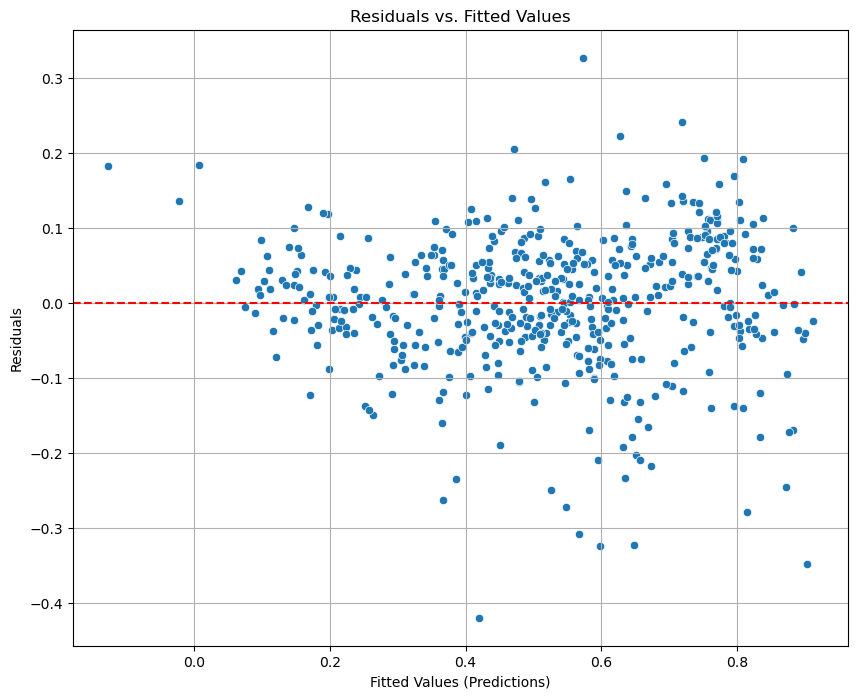

<Figure size 1000x800 with 0 Axes>

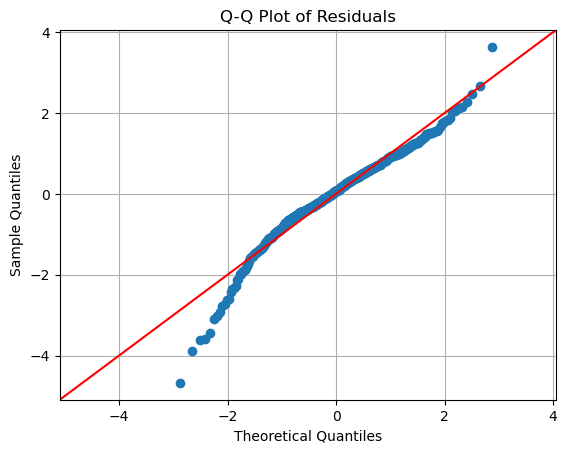

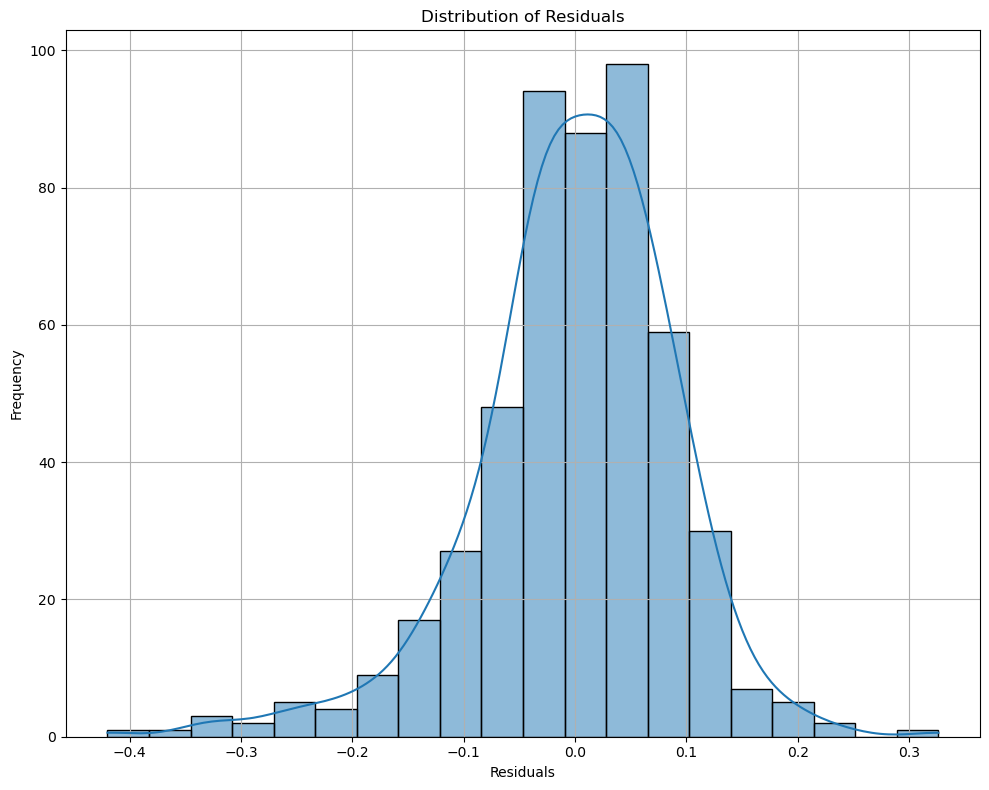


Model Summary:
------------------------------
R-squared: 0.8396
Adjusted R-squared: 0.8353
Root Mean Squared Error (RMSE): 0.0898
Mean of Residuals: 0.0000
Standard Deviation of Residuals: 0.0898
Skewness of Residuals: -0.7724
Kurtosis of Residuals: 2.3023

Overall Residual Analysis:
------------------------------
The mean of the residuals is very close to zero, indicating no significant bias in predictions.
The residuals are moderately negatively skewed, indicating a tail on the left side.
The residuals have a low kurtosis, indicating lighter tails than a normal distribution.


In [115]:
# Evaluate residuals and get the residual statistics
residuals = evaluate_residuals(model6, X_train_after_model5, y_train)

In [79]:
bike_df_test.shape

(215, 30)

# Below are the final test results

## **Training Data**
R-squared             : 0.840
Adj. R-squared        : 0.835


## **Test Data**
R-squared             : 0.8396
Root Mean Squared Error (RMSE): 0.0898
Mean of residuals: 0.0000
Standard deviation of residuals: 0.0898
Skewness of residuals: -0.7724
Kurtosis of residuals: 2.3023

## Hence, our model can be considered good.

Final Features Considered For Evaluation:

1. temp
2. hum
3. workingday
4. windspeed
5. weathersit_bad
6. holiday
7. season_summer
8. season_winter
9. weathersit_moderate
10. mnth_sept
11. mnth_oct
12. weekday_sat
13. yr


# Model Interception and Overview

bike_df.cnt =  0.1476 
            + (0.5610 * bike_df.temp) 
            - (0.1543 * bike_df.hum)
            + (0.0442 * bike_df.workingday)
            - (0.1079 * bike_df.windspeed)
            - (0.2173 * bike_df.weathersit_bad)
            - (0.0948 * bike_df.holiday)
            + (0.0857 * bike_df.season_summer)
            + (0.1227 * bike_df.season_winter)
            - (0.0474 * bike_df.weathersit_moderate)
            + (0.1123 * bike_df.mnth_sept)
            + (0.0644 * bike_df.mnth_oct)
            + (0.0559 * bike_df.weekday_sat)
            + (0.2282 * bike_df.yr)

We have both positive and negative coefficients here.


## Overall Insights and Inferences:

### Positive Contributors to Bike Demand:
####     Temperature (temp):
            - Coefficient: +0.5610
            - Inference: Temperature is the most significant positive contributor to bike demand. As the temperature increases, the number of bike rentals rises, indicating that warmer weather encourages more people to use bikes.

####     Year (yr):
            - Coefficient: +0.2282
            - Inference: The positive coefficient for the year suggests that there is an increasing trend in bike demand over time, potentially due to growing awareness and adoption of bike-sharing services.
####      Winter Season (season_winter):
            - Coefficient: +0.1227
            - Inference: Surprisingly, the winter season also shows a positive impact on bike demand, which may indicate that, in some areas, bike rentals remain consistent even in colder months, possibly due to less extreme winter conditions or increased indoor biking options.
####      September (mnth_sept):
            - Coefficient: +0.1123
            - Inference: September shows a significant positive impact on bike demand, likely due to favorable weather conditions and the return of people to regular routines after the summer holidays.
####      Saturday (weekday_sat):
            - Coefficient: +0.0559
            - Inference: The positive coefficient for Saturday indicates higher bike rentals on weekends, reflecting leisure activities or family outings.
####      October (mnth_oct):
            - Coefficient: +0.0644
            - Inference: October also contributes positively to bike demand, possibly due to moderate weather conditions ideal for outdoor activities.
####      Summer Season (season_summer):
            - Coefficient: +0.0857
            - Inference: The summer season, typically associated with higher outdoor activity, positively impacts bike rentals.
####      Working Day (workingday):
            - Coefficient: +0.0442
            - Inference: There is a slight positive effect of working days on bike demand, possibly indicating usage for commuting purposes.

### Negative Contributors to Bike Demand:
#### Humidity (hum):
    - Coefficient: -0.1543
    - Inference: High humidity negatively affects bike demand, as uncomfortable weather conditions discourage people from using bikes.
#### Windspeed (windspeed):
    - Coefficient: -0.1079
    - Inference: Higher wind speeds reduce bike rentals, likely due to the difficulty and discomfort associated with biking in windy conditions.
#### Bad Weather (weathersit_bad):
    - Coefficient: -0.2173
    - Inference: Bad weather conditions significantly decrease bike demand, as adverse weather such as heavy rain or snow deters outdoor activities.
#### Moderate Weather (weathersit_moderate):
    - Coefficient: -0.0474
    - Inference: Even moderate weather conditions have a slight negative impact on bike demand, though to a lesser extent than bad weather.
#### Holiday (holiday):
    - Coefficient: -0.0948
    - Inference: Holidays show a negative impact on bike demand, possibly due to people preferring other modes of transport or staying indoors.

### Top 3 Significant Contributors:
- Temperature (temp): +0.5610
- Year (yr): +0.2282
- Bad Weather (weathersit_bad): -0.2173